In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#DATA

In [10]:
import os
import urllib.request

# 1. Konfigurasi URL GitHub Raw
# Ganti dengan link raw file txt kamu di GitHub
GITHUB_RAW_URL = "https://raw.githubusercontent.com/raihaanss73/deteksi-epilepsi/refs/heads/main/eeg-project/data/data_epilepsi.txt"
# 2. Nama file lokal untuk menyimpan hasil unduhan sementara
LOCAL_FILE = "data_epilepsi.txt"

# 3. Mengunduh file dari GitHub
print("Sedang mengunduh data dari GitHub...")
urllib.request.urlretrieve(GITHUB_RAW_URL, LOCAL_FILE)
print("Unduhan selesai.")

# 4. Membaca dan memproses isi file
with open(LOCAL_FILE, 'r') as file:
    content = file.read()

# Membersihkan newline (seperti syntax awalmu)
content = content.replace('\n', '')

# (Opsional) Hapus file lokal setelah dibaca agar tidak memenuhi penyimpanan
os.remove(LOCAL_FILE)

print("Data berhasil diproses.")

Sedang mengunduh data dari GitHub...
Unduhan selesai.
Data berhasil diproses.


In [11]:
content = content.replace('  ', ' ')
content = content.replace(' ', ',')
content = content.replace('[[', '[')
content = content.split(']]')
content.pop()


''

In [12]:
ep_ds = []
for c in content:
  temp = c.split('[')
  temp.pop(0)
  data = []
  for t in temp:
    temp2 = t.replace(']', '')
    temp2_list = temp2.split(',')
    for i in range(len(temp2_list)):
      if temp2_list[i] == '':
        temp2_list.pop(i)
      else:
        temp2_list[i] = float(temp2_list[i])
    data.append(temp2_list)
  ep_ds.append(np.array(data))

In [13]:
len(ep_ds)

120

In [14]:
ep_label = [1]*len(ep_ds)

In [16]:
#data normal

GITHUB_RAW_URL2 = "https://raw.githubusercontent.com/raihaanss73/deteksi-epilepsi/refs/heads/main/eeg-project/data/data_normal.txt"

LOCAL_FILE2 = "data_normal.txt"

# 3. Mengunduh file dari GitHub
print("Sedang mengunduh data dari GitHub...")
urllib.request.urlretrieve(GITHUB_RAW_URL2, LOCAL_FILE2)
print("Unduhan selesai.")

# 4. Membaca dan memproses isi file
with open(LOCAL_FILE2, 'r') as file:
    content2 = file.read()

# Membersihkan newline (seperti syntax awalmu)
content2 = content2.replace('\n', '')

# (Opsional) Hapus file lokal setelah dibaca agar tidak memenuhi penyimpanan
os.remove(LOCAL_FILE2)

print("Data berhasil diproses.")

Sedang mengunduh data dari GitHub...
Unduhan selesai.
Data berhasil diproses.


In [17]:
content2 = content2.replace('  ', ' ')
content2 = content2.replace(' ', ',')
content2 = content2.replace('[[', '[')
content2 = content2.split(']]')
content2.pop()

''

In [18]:
nor_ds = []
for c in content2:
  temp = c.split('[')
  temp.pop(0)
  data = []
  for t in temp:
    temp2 = t.replace(']', '')
    temp2_list = temp2.split(',')
    for i in range(len(temp2_list)):
      if temp2_list[i] == '':
        temp2_list.pop(i)
      else:
        temp2_list[i] = float(temp2_list[i])
    data.append(temp2_list)
  nor_ds.append(np.array(data))

In [19]:
nor_label = [0]*len(nor_ds)

In [20]:
data_set = ep_ds + nor_ds
data_label = ep_label + nor_label

In [21]:
data_set = np.array(data_set)
data_label = np.array(data_label)

In [22]:
new_data_set = []
for data in data_set:
  temp = []
  for row in data:
    for val in row:
      temp.append(val)
  new_data_set.append(temp)

In [23]:
import numpy as np
data = np.array(new_data_set)

data.shape

(230, 900)

In [24]:
print(data)

[[1.82260419e-03 1.82260419e-03 1.60377844e-03 ... 2.16247880e-05
  1.97420064e-05 1.78592247e-05]
 [1.66908011e-03 1.66908011e-03 1.27960698e-03 ... 3.50672866e-05
  4.46531331e-05 5.42389795e-05]
 [2.35754952e-03 2.35754952e-03 1.32406052e-03 ... 1.94836211e-05
  4.06273323e-05 6.17710434e-05]
 ...
 [2.40582615e-04 2.40582615e-04 3.30476686e-04 ... 4.18433401e-05
  2.77621301e-05 1.36809201e-05]
 [8.69172223e-04 8.69172223e-04 7.55075254e-04 ... 6.17578197e-05
  5.85612404e-05 5.53646611e-05]
 [4.21638264e-04 4.21638264e-04 4.88350127e-04 ... 2.56644161e-05
  2.57935810e-05 2.59227459e-05]]


In [ ]:
import pandas as pd

# Assuming 'data' is your NumPy array
df = pd.DataFrame(data)

# Concatenate the first and last 3 rows
df_first_last = pd.concat([df.head(3), df.tail(3)])

# Display the result
print(df_first_last)


          0         1         2         3         4         5         6    \
0    0.001823  0.001823  0.001604  0.001385  0.001203  0.001020  0.001035   
1    0.001669  0.001669  0.001280  0.000890  0.000994  0.001097  0.000839   
2    0.002358  0.002358  0.001324  0.000291  0.000561  0.000832  0.000737   
227  0.000241  0.000241  0.000330  0.000420  0.000393  0.000365  0.000244   
228  0.000869  0.000869  0.000755  0.000641  0.000560  0.000479  0.000300   
229  0.000422  0.000422  0.000488  0.000555  0.000504  0.000452  0.000343   

          7         8         9    ...       890       891       892  \
0    0.001050  0.000787  0.000525  ...  0.000088  0.000084  0.000049   
1    0.000581  0.000531  0.000482  ...  0.000034  0.000044  0.000045   
2    0.000642  0.000456  0.000270  ...  0.000066  0.000057  0.000052   
227  0.000124  0.000506  0.000888  ...  0.000096  0.000089  0.000062   
228  0.000121  0.000090  0.000058  ...  0.000121  0.000095  0.000077   
229  0.000234  0.000340  0.0

#PCA MANUAL

In [ ]:
import numpy as np
import pandas as pd

# 1. Center the data (subtract the mean of each feature)
data_mean = np.mean(data, axis=0)
data_centered = data - data_mean
print("Step 1: Data after centering (subtracting the mean):\n", data_centered[:5])

# 2. Calculate the covariance matrix of the centered data
cov_matrix = np.cov(data_centered, rowvar=False)
print("\nStep 2: Covariance matrix:\n", cov_matrix)

# 3. Calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\nStep 3: Eigenvalues:\n", eigenvalues)
print("\nStep 3: Eigenvectors:\n", eigenvectors)

# 4. Sort the eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
print("\nStep 4: Sorted Eigenvalues:\n", sorted_eigenvalues)
print("\nStep 4: Sorted Eigenvectors:\n", sorted_eigenvectors)

# 5. Select the top `n_components` eigenvectors (in this case, 4 components)
n_components = 10
selected_eigenvectors = sorted_eigenvectors[:, :n_components]
print("\nStep 5: Selected top 4 Eigenvectors (Principal Components):\n", selected_eigenvectors)

# 6. Transform the data to the new space defined by the selected principal components
dataset2_manual = np.dot(data_centered, selected_eigenvectors)
print("\nStep 6: Transformed data (first 5 rows):\n", dataset2_manual[:5])


Step 1: Data after centering (subtracting the mean):
 [[ 6.13927623e-04  6.13927623e-04  5.70406873e-04 ... -2.18289931e-05
  -2.68587038e-05 -3.18939187e-05]
 [ 4.60403543e-04  4.60403543e-04  2.46235413e-04 ... -8.38649446e-06
  -1.94757710e-06  4.48583608e-06]
 [ 1.14887295e-03  1.14887295e-03  2.90688953e-04 ... -2.39701600e-05
  -5.97337790e-06  1.20179000e-05]
 [ 1.99356913e-04  1.99356913e-04  1.63416153e-04 ...  1.45927865e-05
  -3.26631610e-06 -2.11309228e-05]
 [-6.09348157e-04 -6.09348157e-04 -7.02880286e-04 ... -3.84128362e-05
  -3.24903962e-05 -2.65734602e-05]]

Step 2: Covariance matrix:
 [[ 6.71706892e-07  6.71706892e-07  4.26742098e-07 ...  6.33950937e-10
  -1.45541787e-09 -3.54481638e-09]
 [ 6.71706892e-07  6.71706892e-07  4.26742098e-07 ...  6.33950937e-10
  -1.45541787e-09 -3.54481638e-09]
 [ 4.26742098e-07  4.26742098e-07  3.35469874e-07 ...  8.69523894e-10
  -1.44592723e-09 -3.76200992e-09]
 ...
 [ 6.33950937e-10  6.33950937e-10  8.69523894e-10 ...  8.44648074e-10
 

In [ ]:
selected_eigenvectors

array([[-8.21708144e-02+0.j,  1.03904205e-01+0.j, -2.03185682e-01+0.j,
        ..., -1.70510278e-01+0.j,  1.81829270e-02+0.j,
         1.64727320e-01+0.j],
       [-8.21708144e-02+0.j,  1.03904205e-01+0.j, -2.03185682e-01+0.j,
        ..., -1.70510278e-01+0.j,  1.81829270e-02+0.j,
         1.64727320e-01+0.j],
       [-5.63797567e-02+0.j,  8.34040643e-02+0.j, -1.58794482e-01+0.j,
        ..., -9.26961273e-02+0.j,  8.04654686e-02+0.j,
         1.09786115e-01+0.j],
       ...,
       [ 6.17566491e-04+0.j, -3.27995289e-03+0.j, -2.43055005e-03+0.j,
        ...,  3.40795214e-03+0.j, -3.41460329e-03+0.j,
         8.35222974e-04+0.j],
       [ 7.18852904e-04+0.j, -7.57059327e-03+0.j, -2.45409347e-03+0.j,
        ...,  1.79997400e-03+0.j, -2.00865254e-03+0.j,
         3.28821511e-03+0.j],
       [ 8.21741939e-04+0.j, -1.18671478e-02+0.j, -2.47510467e-03+0.j,
        ...,  1.78070445e-04+0.j, -6.00511399e-04+0.j,
         5.74463394e-03+0.j]])

In [ ]:
# prompt: "selected_eigenvectors" simpan dalam file excel

import pandas as pd

# Assuming 'selected_eigenvectors' is defined from the previous code
# ... (your existing code) ...

# Create a Pandas DataFrame from the selected eigenvectors
df_eigenvectors = pd.DataFrame(selected_eigenvectors)

# Save the DataFrame to an Excel file in your Google Drive
df_eigenvectors.to_excel('/content/drive/MyDrive/selected_eigenvectors.xlsx', index=False)

In [ ]:
# Menampilkan hasil PCA dalam bentuk DataFrame
df_eigenvectors = pd.DataFrame(selected_eigenvectors, columns=[f'PC{i+1}' for i in range(10)])

# Mengatur tampilan angka dalam format yang diinginkan (-8.217×10^(-2))
df_eigenvectors = df_eigenvectors.applymap(lambda x: '{:.3e}'.format(x).replace('e', '×10^'))

# Menyimpan data PCA ke dalam file Excel
file_name = 'eigen vektor.xlsx'
df_eigenvectors.to_excel(file_name, index=False)

# Mendownload file Excel
files.download(file_name)

print("Data berhasil disimpan dan diunduh dalam format Excel.")

In [ ]:
print (eigenvalues[0])
print (sorted_eigenvalues[4])
print (sorted_eigenvalues[5])
print (sorted_eigenvalues[6])
print (sorted_eigenvalues[7])
print (sorted_eigenvalues[8])
print (sorted_eigenvalues[9])

(9.430747700458344e-06+0j)
(1.714256142300568e-06+0j)
(1.3463209069979771e-06+0j)
(1.1961925775192407e-06+0j)
(1.1572808603354826e-06+0j)
(9.49561031467549e-07+0j)
(9.11283499122238e-07+0j)


In [ ]:
# prompt: cek apakah eigen velue pertama sama nilai nya dengan sorted_eigenvalues yang pertama
import numpy as np

# Use np.array_equal to compare arrays
if np.array_equal(eigenvectors[0], sorted_eigenvectors[0]):
  print("Eigenvalue pertama sama dengan sorted_eigenvalues pertama")
else:
  print("Eigenvalue pertama tidak sama dengan sorted_eigenvalues pertama")

Eigenvalue pertama tidak sama dengan sorted_eigenvalues pertama


In [ ]:
sorted_eigenvalues[0:10]

array([9.43074770e-06+0.j, 4.53664354e-06+0.j, 3.11710124e-06+0.j,
       2.51636044e-06+0.j, 1.71425614e-06+0.j, 1.34632091e-06+0.j,
       1.19619258e-06+0.j, 1.15728086e-06+0.j, 9.49561031e-07+0.j,
       9.11283499e-07+0.j])

In [ ]:
print (eigenvalues[0], eigenvectors[0])

(9.430747700458344e-06+0j) [-8.21708144e-02+0.00000000e+00j  1.03904205e-01+0.00000000e+00j
 -2.03185682e-01+0.00000000e+00j  2.94346024e-01+0.00000000e+00j
 -2.45330944e-02+0.00000000e+00j  1.99257953e-01+0.00000000e+00j
 -1.25245525e-01+0.00000000e+00j -1.70510278e-01+0.00000000e+00j
  1.81829270e-02+0.00000000e+00j  1.64727320e-01+0.00000000e+00j
 -5.30973491e-03+0.00000000e+00j -1.15035116e-01+0.00000000e+00j
  1.40459674e-02+0.00000000e+00j -1.38358650e-01+0.00000000e+00j
  8.19753145e-02+0.00000000e+00j  7.62789351e-02+0.00000000e+00j
  1.23544271e-01+0.00000000e+00j -1.63404062e-01+0.00000000e+00j
 -1.44466449e-03+0.00000000e+00j  1.37126962e-01+0.00000000e+00j
  1.45423584e-01+0.00000000e+00j -9.48642419e-02+0.00000000e+00j
 -5.64392424e-02+0.00000000e+00j  7.00822241e-02+0.00000000e+00j
  1.13124648e-01+0.00000000e+00j -7.01752625e-02+0.00000000e+00j
 -4.27958917e-02+0.00000000e+00j -3.69395663e-02+0.00000000e+00j
 -3.14181760e-02+0.00000000e+00j -1.75114073e-02+0.00000000e+00

In [ ]:
print (sorted_eigenvalues[0], sorted_eigenvectors[0])

(9.430747700458344e-06+0j) [-8.21708144e-02+0.00000000e+00j  1.03904205e-01+0.00000000e+00j
 -2.03185682e-01+0.00000000e+00j  2.94346024e-01+0.00000000e+00j
 -2.45330944e-02+0.00000000e+00j  1.99257953e-01+0.00000000e+00j
 -1.25245525e-01+0.00000000e+00j -1.70510278e-01+0.00000000e+00j
  1.81829270e-02+0.00000000e+00j  1.64727320e-01+0.00000000e+00j
 -5.30973491e-03+0.00000000e+00j -1.15035116e-01+0.00000000e+00j
  1.40459674e-02+0.00000000e+00j -1.38358650e-01+0.00000000e+00j
  8.19753145e-02+0.00000000e+00j  7.62789351e-02+0.00000000e+00j
  1.23544271e-01+0.00000000e+00j -1.63404062e-01+0.00000000e+00j
 -1.44466449e-03+0.00000000e+00j  1.37126962e-01+0.00000000e+00j
  1.45423584e-01+0.00000000e+00j -9.48642419e-02+0.00000000e+00j
 -5.64392424e-02+0.00000000e+00j  7.00822241e-02+0.00000000e+00j
  1.13124648e-01+0.00000000e+00j -7.01752625e-02+0.00000000e+00j
 -4.27958917e-02+0.00000000e+00j -3.69395663e-02+0.00000000e+00j
 -3.14181760e-02+0.00000000e+00j -1.75114073e-02+0.00000000e+00

In [ ]:
print (sorted_eigenvalues[0], sorted_eigenvectors[0])
print (sorted_eigenvalues[1], sorted_eigenvectors[1])
print (sorted_eigenvalues[2], sorted_eigenvectors[2])
print (sorted_eigenvalues[3], sorted_eigenvectors[3])

(9.430747700458344e-06+0j) [-8.21708144e-02+0.00000000e+00j  1.03904205e-01+0.00000000e+00j
 -2.03185682e-01+0.00000000e+00j  2.94346024e-01+0.00000000e+00j
 -2.45330944e-02+0.00000000e+00j  1.99257953e-01+0.00000000e+00j
 -1.25245525e-01+0.00000000e+00j -1.70510278e-01+0.00000000e+00j
  1.81829270e-02+0.00000000e+00j  1.64727320e-01+0.00000000e+00j
 -5.30973491e-03+0.00000000e+00j -1.15035116e-01+0.00000000e+00j
  1.40459674e-02+0.00000000e+00j -1.38358650e-01+0.00000000e+00j
  8.19753145e-02+0.00000000e+00j  7.62789351e-02+0.00000000e+00j
  1.23544271e-01+0.00000000e+00j -1.63404062e-01+0.00000000e+00j
 -1.44466449e-03+0.00000000e+00j  1.37126962e-01+0.00000000e+00j
  1.45423584e-01+0.00000000e+00j -9.48642419e-02+0.00000000e+00j
 -5.64392424e-02+0.00000000e+00j  7.00822241e-02+0.00000000e+00j
  1.13124648e-01+0.00000000e+00j -7.01752625e-02+0.00000000e+00j
 -4.27958917e-02+0.00000000e+00j -3.69395663e-02+0.00000000e+00j
 -3.14181760e-02+0.00000000e+00j -1.75114073e-02+0.00000000e+00

In [ ]:
sorted_eigenvectors[0]

array([-8.21708144e-02+0.00000000e+00j,  1.03904205e-01+0.00000000e+00j,
       -2.03185682e-01+0.00000000e+00j,  2.94346024e-01+0.00000000e+00j,
       -2.45330944e-02+0.00000000e+00j,  1.99257953e-01+0.00000000e+00j,
       -1.25245525e-01+0.00000000e+00j, -1.70510278e-01+0.00000000e+00j,
        1.81829270e-02+0.00000000e+00j,  1.64727320e-01+0.00000000e+00j,
       -5.30973491e-03+0.00000000e+00j, -1.15035116e-01+0.00000000e+00j,
        1.40459674e-02+0.00000000e+00j, -1.38358650e-01+0.00000000e+00j,
        8.19753145e-02+0.00000000e+00j,  7.62789351e-02+0.00000000e+00j,
        1.23544271e-01+0.00000000e+00j, -1.63404062e-01+0.00000000e+00j,
       -1.44466449e-03+0.00000000e+00j,  1.37126962e-01+0.00000000e+00j,
        1.45423584e-01+0.00000000e+00j, -9.48642419e-02+0.00000000e+00j,
       -5.64392424e-02+0.00000000e+00j,  7.00822241e-02+0.00000000e+00j,
        1.13124648e-01+0.00000000e+00j, -7.01752625e-02+0.00000000e+00j,
       -4.27958917e-02+0.00000000e+00j, -3.69395663

In [ ]:
selected_eigenvectors[0]

array([-0.08217081+0.j,  0.1039042 +0.j, -0.20318568+0.j,  0.29434602+0.j])

In [ ]:
selected_eigenvectors[899]

array([ 0.00082174+0.j, -0.01186715+0.j, -0.0024751 +0.j, -0.00395002+0.j])

In [ ]:
# prompt: print kolom kedua dari selected_eigenvectors

print(selected_eigenvectors[:, 2])

[-2.03185682e-01+0.j -2.03185682e-01+0.j -1.58794482e-01+0.j
 -1.14403282e-01+0.j -8.20804177e-02+0.j -4.97575536e-02+0.j
 -3.22728649e-02+0.j -1.47881762e-02+0.j -1.37798871e-02+0.j
 -1.27715981e-02+0.j -1.67287778e-02+0.j -2.06859574e-02+0.j
 -1.38571437e-02+0.j -7.02832999e-03+0.j -7.79069665e-03+0.j
 -8.55306331e-03+0.j -8.95895788e-03+0.j -9.36485243e-03+0.j
 -8.13602249e-03+0.j -6.90719259e-03+0.j -5.69212012e-03+0.j
 -4.47704767e-03+0.j -5.30397859e-03+0.j -6.13090955e-03+0.j
 -6.68981618e-03+0.j -7.24872282e-03+0.j -6.45794015e-03+0.j
 -5.66715750e-03+0.j -3.65648633e-03+0.j -1.64581518e-03+0.j
 -2.69379749e-03+0.j -3.74177980e-03+0.j -5.29303314e-04+0.j
  2.68317318e-03+0.j  5.91021632e-04+0.j -1.50112990e-03+0.j
  5.59410456e-04+0.j  2.61995082e-03+0.j  8.49595707e-04+0.j
 -9.20759407e-04+0.j -7.03124105e-04+0.j -4.85488805e-04+0.j
  1.54258208e-04+0.j  7.94005223e-04+0.j  4.08884774e-04+0.j
  2.37643330e-05+0.j  6.89618730e-04+0.j  1.35547308e-03+0.j
 -2.97497550e-04+0.j -1.

In [ ]:
data_mean[0]

0.001208676566761739

In [ ]:
data_centered

array([[ 6.13927623e-04,  6.13927623e-04,  5.70406873e-04, ...,
        -2.18289931e-05, -2.68587038e-05, -3.18939187e-05],
       [ 4.60403543e-04,  4.60403543e-04,  2.46235413e-04, ...,
        -8.38649446e-06, -1.94757710e-06,  4.48583608e-06],
       [ 1.14887295e-03,  1.14887295e-03,  2.90688953e-04, ...,
        -2.39701600e-05, -5.97337790e-06,  1.20179000e-05],
       ...,
       [-9.68093952e-04, -9.68093952e-04, -7.02894881e-04, ...,
        -1.61044096e-06, -1.88385801e-05, -3.60722233e-05],
       [-3.39504344e-04, -3.39504344e-04, -2.78296313e-04, ...,
         1.83040386e-05,  1.19605302e-05,  5.61151768e-06],
       [-7.87038303e-04, -7.87038303e-04, -5.45021440e-04, ...,
        -1.77893650e-05, -2.08071292e-05, -2.38303975e-05]])

In [ ]:
cov_matrix[3]

array([ 1.81777305e-07,  1.81777305e-07,  2.44197650e-07,  3.06617996e-07,
        1.94571290e-07,  8.25245845e-08,  5.98856379e-08,  3.72466910e-08,
        3.19342000e-08,  2.66217090e-08,  2.75665658e-08,  2.85114223e-08,
        2.37899479e-08,  1.90684735e-08,  1.74468042e-08,  1.58251348e-08,
        1.78412140e-08,  1.98572932e-08,  2.02094228e-08,  2.05615523e-08,
        1.69337743e-08,  1.33059963e-08,  1.45570783e-08,  1.58081603e-08,
        1.30909002e-08,  1.03736400e-08,  1.37552771e-08,  1.71369141e-08,
        1.54585648e-08,  1.37802154e-08,  1.34305864e-08,  1.30809575e-08,
        1.41937559e-08,  1.53065544e-08,  1.31912567e-08,  1.10759590e-08,
        1.06551316e-08,  1.02343041e-08,  9.21177752e-09,  8.18925088e-09,
        1.02963392e-08,  1.24034276e-08,  1.09114089e-08,  9.41939021e-09,
        9.94410396e-09,  1.04688177e-08,  9.91185196e-09,  9.35488625e-09,
        1.10132234e-08,  1.26715605e-08,  1.17473431e-08,  1.08231256e-08,
        1.03533333e-08,  

In [ ]:
# prompt: print x1,1, x2,2, x3,3,..,x99,99 dari cov_matrix

for i in range(900):
  print(f"x{i+1},{cov_matrix[i][i]}")

x1,6.717068915512806e-07
x2,6.717068915512806e-07
x3,3.354698740892326e-07
x4,3.066179958030928e-07
x5,1.5202125922428198e-07
x6,1.3641787103909828e-07
x7,6.339040282613613e-08
x8,5.7501301431637495e-08
x9,3.992586403243153e-08
x10,6.092146516220038e-08
x11,3.145521504973689e-08
x12,2.3969861032525553e-08
x13,1.2408298630097963e-08
x14,1.045910822416767e-08
x15,6.739658750896396e-09
x16,9.77184871112599e-09
x17,7.137288673778083e-09
x18,9.195570339822669e-09
x19,5.755968135406813e-09
x20,7.597346702914728e-09
x21,4.9106992249407505e-09
x22,7.574476386296352e-09
x23,5.333808663415722e-09
x24,8.754035696079166e-09
x25,5.050333856495079e-09
x26,7.155477459906883e-09
x27,5.885597278747401e-09
x28,9.823526528902838e-09
x29,6.961503642864859e-09
x30,1.0235104719091819e-08
x31,6.3607419953789765e-09
x32,8.329027886008917e-09
x33,5.256822565266677e-09
x34,7.026733042248167e-09
x35,5.886966654662999e-09
x36,9.464656733119751e-09
x37,7.0487774339787136e-09
x38,8.40833973252265e-09
x39,5.35460342

In [ ]:
dataset2_manual

array([[-2.18981821e-04+0.j,  5.46654255e-04+0.j,  1.57116732e-03+0.j,
         9.60391858e-04+0.j],
       [-1.22674954e-03+0.j,  6.61847261e-04+0.j,  3.56124626e-05+0.j,
         3.38429380e-04+0.j],
       [-1.49232727e-03+0.j,  5.25885459e-04+0.j, -1.56720633e-03+0.j,
         1.10092912e-03+0.j],
       [-1.31480867e-04+0.j,  9.34733956e-04+0.j, -8.75111189e-04+0.j,
         1.32511845e-03+0.j],
       [-1.12521363e-03+0.j,  4.07117555e-04+0.j,  2.80943195e-03+0.j,
        -1.00957418e-03+0.j],
       [ 5.33162877e-04+0.j,  1.69822843e-03+0.j,  3.50709095e-03+0.j,
        -5.40590159e-04+0.j],
       [ 4.62800834e-04+0.j,  1.49372284e-03+0.j,  2.04467171e-03+0.j,
         1.75549617e-03+0.j],
       [ 1.54055724e-03+0.j,  2.32389761e-03+0.j,  3.31497250e-03+0.j,
        -1.23662835e-03+0.j],
       [-1.48160868e-03+0.j,  1.24100230e-03+0.j, -4.54321710e-04+0.j,
        -7.61853677e-04+0.j],
       [-1.98859602e-03+0.j,  5.33511021e-04+0.j,  9.52411249e-05+0.j,
         9.96687971e

#**TAHAP KLASIFIKASI**

##PROSES PCA

In [ ]:
from sklearn.decomposition import PCA

# PCA transformation
pca = PCA(n_components=1)
dataset = pca.fit_transform(data)

In [ ]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
dataset2 = pca2.fit_transform(data)

In [ ]:
from sklearn.decomposition import PCA

pca3 = PCA(n_components=3)
dataset3 = pca3.fit_transform(data)

In [ ]:
from sklearn.decomposition import PCA

pca4 = PCA(n_components=4)
dataset4 = pca4.fit_transform(data)

In [ ]:
from sklearn.decomposition import PCA

pca5 = PCA(n_components=5)
dataset5 = pca5.fit_transform(data)

In [ ]:
from sklearn.decomposition import PCA

pca6 = PCA(n_components=6)
dataset6 = pca6.fit_transform(data)

In [ ]:
from sklearn.decomposition import PCA

pca7 = PCA(n_components=7)
dataset7 = pca7.fit_transform(data)

In [ ]:
from sklearn.decomposition import PCA

pca8 = PCA(n_components=8)
dataset8 = pca8.fit_transform(data)

In [ ]:
from sklearn.decomposition import PCA

# PCA transformation
pca9 = PCA(n_components=9)
dataset9 = pca9.fit_transform(data)

In [ ]:
# PCA transformation
pca10 = PCA(n_components=10)
dataset10 = pca10.fit_transform(data)

In [ ]:
loadings = pca2.components_.T * np.sqrt(pca2.explained_variance_)
print(loadings)


[[ 2.52342648e-04 -2.21309944e-04]
 [ 2.52342648e-04 -2.21309944e-04]
 [ 1.73139541e-04 -1.77645585e-04]
 ...
 [-1.89651723e-06  6.98610601e-06]
 [-2.20756303e-06  1.61249131e-05]
 [-2.52353039e-06  2.52763170e-05]]


In [ ]:
# Data hasil PCA dengan 10 fitur

dataset10

array([[ 2.18981821e-04, -5.46654254e-04, -1.57116736e-03, ...,
        -2.16135691e-03, -7.10780240e-04, -6.45544352e-05],
       [ 1.22674954e-03, -6.61847257e-04, -3.56124985e-05, ...,
         2.48384707e-04, -1.22999265e-03, -1.89711849e-04],
       [ 1.49232727e-03, -5.25885456e-04,  1.56720634e-03, ...,
        -6.78304565e-04, -1.99906777e-04,  1.05178033e-03],
       ...,
       [-3.97372881e-03,  1.22666729e-03,  4.54040395e-04, ...,
         1.76987529e-03,  1.24218507e-03, -7.91122940e-05],
       [-3.86883001e-03,  1.37848086e-03,  7.74672653e-05, ...,
        -1.73973855e-06,  2.29457890e-03,  1.94773475e-04],
       [-5.07899585e-03,  4.83060154e-04,  8.20949660e-04, ...,
         1.84481101e-03,  1.18091802e-03,  6.99637261e-04]])

In [ ]:
# Menampilkan hasil PCA dalam bentuk DataFrame
pca_df = pd.DataFrame(dataset10, columns=[f'PC{i+1}' for i in range(10)])

# Mengatur tampilan angka dalam format yang diinginkan (-8.217×10^(-2))
pca_df = pca_df.applymap(lambda x: '{:.3e}'.format(x).replace('e', '×10^'))

# Menyimpan data PCA ke dalam file Excel
file_name = 'pca_resultsss.xlsx'
pca_df.to_excel(file_name, index=False)

# Mendownload file Excel
files.download(file_name)

print("Data berhasil disimpan dan diunduh dalam format Excel.")

<ipython-input-48-29c05cea2f93>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pca_df = pca_df.applymap(lambda x: '{:.3e}'.format(x).replace('e', '×10^'))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Data berhasil disimpan dan diunduh dalam format Excel.


In [ ]:
pca_df = pd.DataFrame(dataset10, columns=[f'PC{i+1}' for i in range(10)])

# Mengatur tampilan agar menampilkan angka dalam notasi ilmiah
pd.set_option('display.float_format', '{:.6e}'.format)

# Menampilkan data PCA
print(pca_df)

              PC1           PC2           PC3           PC4           PC5  \
0    2.189818e-04 -5.466543e-04 -1.571167e-03  9.603920e-04 -8.763256e-04   
1    1.226750e-03 -6.618473e-04 -3.561245e-05  3.384293e-04 -4.997350e-04   
2    1.492327e-03 -5.258855e-04  1.567206e-03  1.100929e-03  8.482081e-04   
3    1.314809e-04 -9.347340e-04  8.751112e-04  1.325118e-03 -1.057983e-03   
4    1.125214e-03 -4.071176e-04 -2.809432e-03 -1.009574e-03 -6.571018e-04   
..            ...           ...           ...           ...           ...   
225 -4.195750e-03  7.232203e-04 -1.097155e-04 -1.705294e-03  1.901316e-03   
226 -4.599851e-03 -8.324348e-04 -5.968978e-04 -2.387983e-03  6.093759e-04   
227 -3.973729e-03  1.226667e-03  4.540404e-04  4.164805e-04 -1.692676e-03   
228 -3.868830e-03  1.378481e-03  7.746723e-05 -1.772622e-05  5.836663e-04   
229 -5.078996e-03  4.830601e-04  8.209496e-04 -1.263161e-03  8.563408e-04   

              PC6           PC7           PC8           PC9          PC10  

In [ ]:
pip install python-docx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 14.4 MB/s eta 0:00:00


In [ ]:
from docx import Document

# Menampilkan hasil PCA dalam bentuk DataFrame
pca_df = pd.DataFrame(dataset10, columns=[f'PC{i+1}' for i in range(10)])

# Mengatur tampilan angka dalam format yang diinginkan (-8.217×10^(-2))
pd.set_option('display.float_format', lambda x: '{:.3e}'.format(x).replace('e', '×10^'))

# Membuat dokumen Word baru
doc = Document()
doc.add_heading('Hasil PCA dalam Notasi Ilmiah', 0)

# Menambahkan tabel ke dokumen Word
table = doc.add_table(rows=1, cols=len(pca_df.columns))

# Menambahkan header kolom
hdr_cells = table.rows[0].cells
for i, col in enumerate(pca_df.columns):
    hdr_cells[i].text = col

# Menambahkan data PCA ke dalam tabel
for index, row in pca_df.iterrows():
    row_cells = table.add_row().cells
    for i, val in enumerate(row):
        row_cells[i].text = '{:.3e}'.format(val).replace('e', '×10^')

# Menyimpan dokumen ke dalam file Word
doc.save('hasil_pca.docx')

In [ ]:
from sklearn.metrics import accuracy_score

##CLASIFICATION

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(dataset2_manual).astype(float), data_label, test_size=0.2, random_state=42)
# The .astype(float) converts the data to real numbers, removing the complex part.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=12)  # You can adjust the number of neighbors

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8913043478260869


<ipython-input-41-4e0cc040dc63>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  X_train, X_test, y_train, y_test = train_test_split(np.array(dataset2_manual).astype(float), data_label, test_size=0.2, random_state=42)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(data), data_label, test_size=0.2, random_state=42)

In [ ]:
print("Total data latih:")
print("Kelas 0 (Normal):", sum(y_train == 0))
print("Kelas 1 (Epilepsi):", sum(y_train == 1))
print("Total:", len(y_train))

print("\nTotal data uji:")
print("Kelas 0 (Normal):", sum(y_test == 0))
print("Kelas 1 (Epilepsi):", sum(y_test == 1))
print("Total:", len(y_test))

Total data latih:
Kelas 0 (Normal): 86
Kelas 1 (Epilepsi): 98
Total: 184

Total data uji:
Kelas 0 (Normal): 24
Kelas 1 (Epilepsi): 22
Total: 46


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=42)  # You can adjust the number of neighbors

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9130434782608695


Confusion Matrix:
[[20  4]
 [ 0 22]]


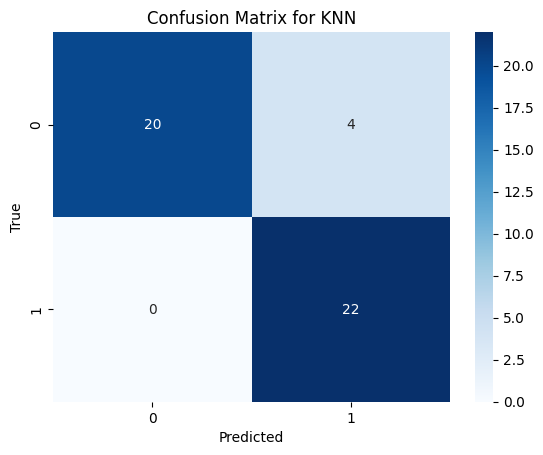

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        24
           1       0.85      1.00      0.92        22

    accuracy                           0.91        46
   macro avg       0.92      0.92      0.91        46
weighted avg       0.93      0.91      0.91        46



In [ ]:
# prompt: create confusion matrix and classification_report KNN

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

# You can also visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for KNN')
plt.show()

# Generate the classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)


**SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM model
svm_model = SVC(kernel='poly')  # You can experiment with different kernels (linear, rbf, poly)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8478260869565217


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8478260869565217


**LVQ**

In [ ]:
# Fungsi untuk menginisialisasi prototipe
def initialize_prototypes(X_train, y_train, num_classes):
    prototypes = []
    for class_label in range(num_classes):
        # Memilih sampel secara acak dari setiap kelas
        class_samples = X_train[y_train == class_label]
        if class_samples.shape[0] > 0:
            prototype = class_samples[np.random.choice(class_samples.shape[0])]
            prototypes.append(prototype)
    return np.array(prototypes)

# Fungsi untuk menemukan prototipe terdekat
def find_closest_prototype(sample, prototypes):
    distances = np.linalg.norm(prototypes - sample, axis=1)
    return np.argmin(distances)


In [ ]:
# Pelatihan LVQ
def train_lvq(X_train, y_train, learning_rate, epochs):
    num_classes = len(np.unique(y_train))
    prototypes = initialize_prototypes(X_train, y_train, num_classes)
    for epoch in range(epochs):
        for i, sample in enumerate(X_train):
            closest_prototype_idx = find_closest_prototype(sample, prototypes)
            # Access the element at index i using array indexing
            if y_train[i] == closest_prototype_idx:
                prototypes[closest_prototype_idx] += learning_rate * (sample - prototypes[closest_prototype_idx])
            else:
                prototypes[closest_prototype_idx] -= learning_rate * (sample - prototypes[closest_prototype_idx])
    return prototypes

# Melatih model LVQ
prototypes = train_lvq(X_train, y_train, learning_rate=0.001, epochs=1000)

In [ ]:
from sklearn.metrics import confusion_matrix

# Fungsi prediksi LVQ
def predict_lvq(X_test, prototypes):
    predictions = []
    for sample in X_test:
        closest_prototype_idx = find_closest_prototype(sample, prototypes)
        predictions.append(closest_prototype_idx)
    return np.array(predictions)

# Membuat prediksi
y_pred = predict_lvq(X_test, prototypes)

akurasi = accuracy_score(y_test, y_pred)
print(f"\nAkurasi: {akurasi * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Akurasi: 86.96%
Confusion Matrix:
[[19  5]
 [ 1 21]]


**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.5869565217391305
              precision    recall  f1-score   support

           0       0.62      0.54      0.58        24
           1       0.56      0.64      0.60        22

    accuracy                           0.59        46
   macro avg       0.59      0.59      0.59        46
weighted avg       0.59      0.59      0.59        46

Confusion Matrix:
[[13 11]
 [ 8 14]]


##CLASIFICATION (PCA 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(dataset), data_label, test_size=0.2, random_state=42)

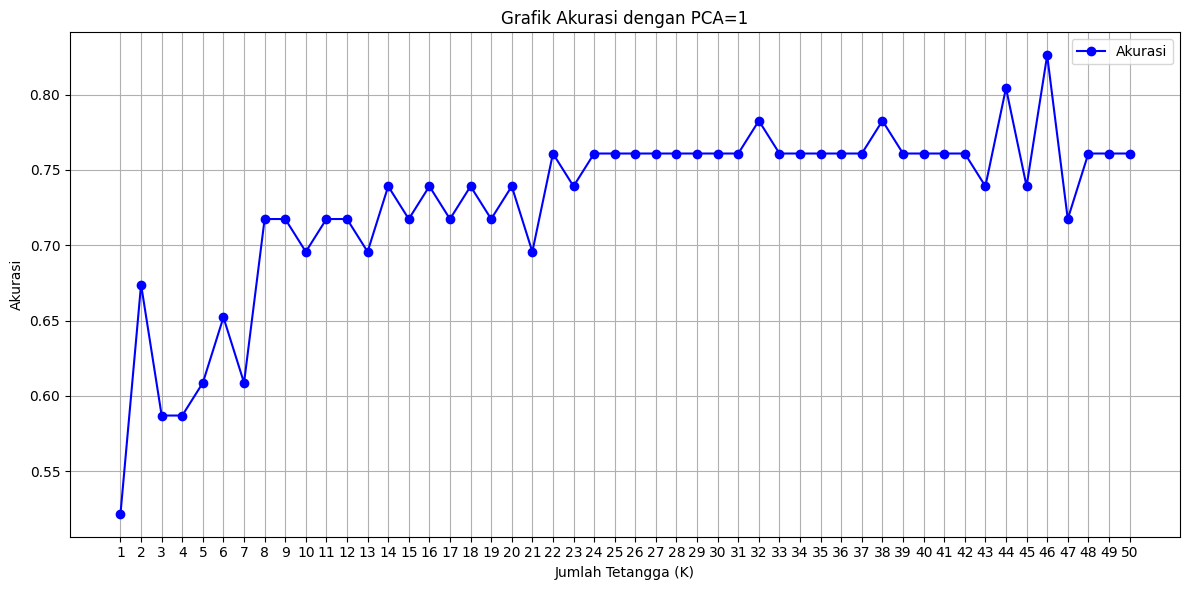

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Rentang nilai K yang akan diuji
k_values = range(1, 51)
accuracies = []

# Iterasi untuk setiap nilai K
for k in k_values:
    # Inisialisasi KNN dengan jumlah tetangga (K) saat ini
    knn = KNeighborsClassifier(n_neighbors=k)
    # Melatih model
    knn.fit(X_train, y_train)
    # Membuat prediksi pada data uji
    y_pred = knn.predict(X_test)
    # Menghitung akurasi
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Membuat grafik akurasi
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', label='Akurasi')
plt.title('Grafik Akurasi dengan PCA=1')
plt.xlabel('Jumlah Tetangga (K)')
plt.ylabel('Akurasi')
plt.xticks(k_values)  # Menampilkan semua nilai K pada sumbu x
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('PCA 1.png', format='png')
plt.show()


In [ ]:
import pandas as pd

# Membuat DataFrame untuk menyimpan nilai K dan akurasinya
accuracy_df = pd.DataFrame({
    'K': k_values,
    'Akurasi': accuracies
})

# Menampilkan tabel akurasi
accuracy_df


,K,Akurasi
0,1,0.521739
1,2,0.673913
2,3,0.586957
3,4,0.586957
4,5,0.608696
5,6,0.652174
6,7,0.608696
7,8,0.717391
8,9,0.717391
9,10,0.695652


In [ ]:
# Menyimpan DataFrame ke file Excel
accuracy_df.to_excel('akurasi_knn.xlsx', index=False)

# Menampilkan pesan bahwa file telah disimpan
print("File Excel telah disimpan dengan nama 'akurasi_knn.xlsx'")


File Excel telah disimpan dengan nama 'akurasi_knn.xlsx'


In [ ]:
# Menemukan nilai K dengan akurasi tertinggi
max_accuracy = max(accuracies)
optimal_k = k_values[accuracies.index(max_accuracy)]

# Mencetak hasil
print(f"Akuras tertinggi: {max_accuracy:.2f} pada nilai K: {optimal_k}")


Akuras tertinggi: 0.83 pada nilai K: 46


##CLASIFICATION (PCA 2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(dataset2), data_label, test_size=0.2, random_state=42)

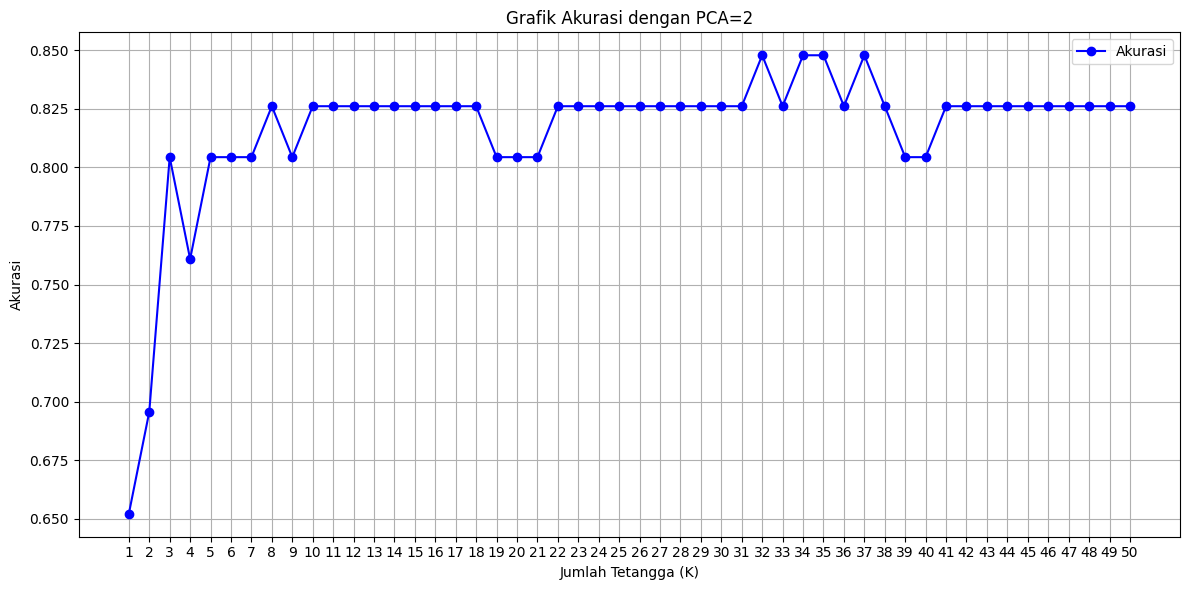

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Rentang nilai K yang akan diuji
k_values = range(1, 51)
accuracies = []

# Iterasi untuk setiap nilai K
for k in k_values:
    # Inisialisasi KNN dengan jumlah tetangga (K) saat ini
    knn = KNeighborsClassifier(n_neighbors=k)
    # Melatih model
    knn.fit(X_train, y_train)
    # Membuat prediksi pada data uji
    y_pred = knn.predict(X_test)
    # Menghitung akurasi
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Membuat grafik akurasi
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', label='Akurasi')
plt.title('Grafik Akurasi dengan PCA=2')
plt.xlabel('Jumlah Tetangga (K)')
plt.ylabel('Akurasi')
plt.xticks(k_values)  # Menampilkan semua nilai K pada sumbu x
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('PCA 2.png', format='png')
plt.show()


In [ ]:
import pandas as pd

# Membuat DataFrame untuk menyimpan nilai K dan akurasinya
accuracy_df = pd.DataFrame({
    'K': k_values,
    'Akurasi': accuracies
})

# Menampilkan tabel akurasi
accuracy_df
# Menyimpan DataFrame ke file Excel
accuracy_df.to_excel('akurasi_knn.xlsx', index=False)

# Menampilkan pesan bahwa file telah disimpan
print("File Excel telah disimpan dengan nama 'akurasi_knn.xlsx'")


File Excel telah disimpan dengan nama 'akurasi_knn.xlsx'


In [ ]:
# Menemukan nilai K dengan akurasi tertinggi
max_accuracy = max(accuracies)
optimal_k = k_values[accuracies.index(max_accuracy)]

# Mencetak hasil
print(f"Akuras tertinggi: {max_accuracy:.2f} pada nilai K: {optimal_k}")


Akuras tertinggi: 0.85 pada nilai K: 32


##CLASIFICATION (PCA 3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(dataset3), data_label, test_size=0.2, random_state=42)

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=36)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8913043478260869


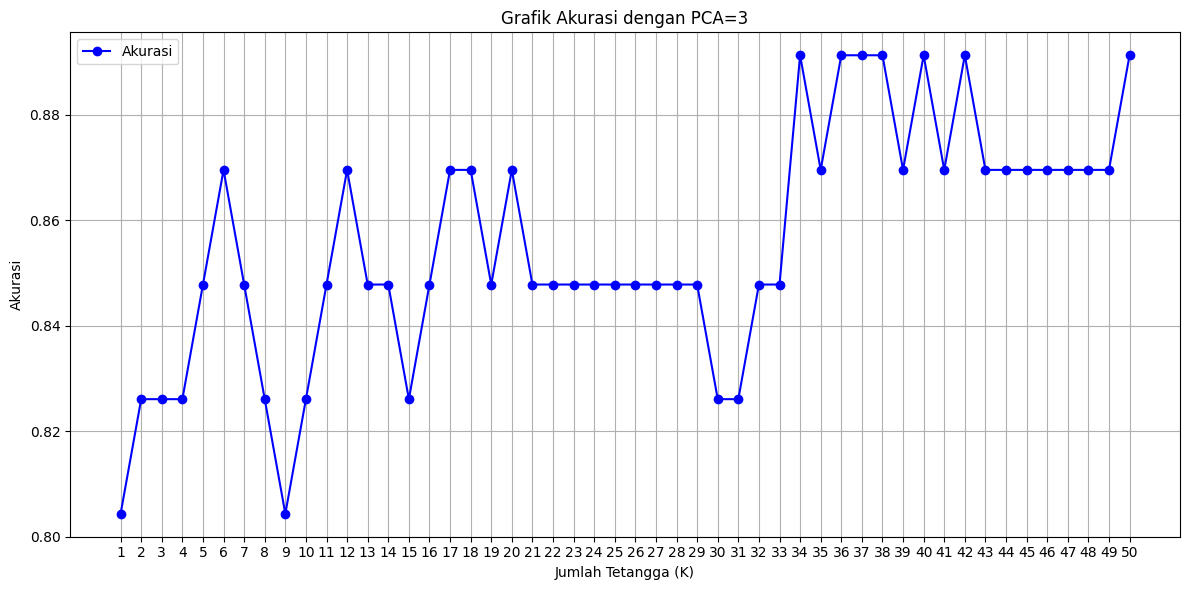

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Rentang nilai K yang akan diuji
k_values = range(1, 51)
accuracies = []

# Iterasi untuk setiap nilai K
for k in k_values:
    # Inisialisasi KNN dengan jumlah tetangga (K) saat ini
    knn = KNeighborsClassifier(n_neighbors=k)
    # Melatih model
    knn.fit(X_train, y_train)
    # Membuat prediksi pada data uji
    y_pred = knn.predict(X_test)
    # Menghitung akurasi
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Membuat grafik akurasi
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', label='Akurasi')
plt.title('Grafik Akurasi dengan PCA=3')
plt.xlabel('Jumlah Tetangga (K)')
plt.ylabel('Akurasi')
plt.xticks(k_values)  # Menampilkan semua nilai K pada sumbu x
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('PCA 3.png', format='png')
plt.show()


In [ ]:
import pandas as pd

# Membuat DataFrame untuk menyimpan nilai K dan akurasinya
accuracy_df = pd.DataFrame({
    'K': k_values,
    'Akurasi': accuracies
})

# Menampilkan tabel akurasi
accuracy_df
# Menyimpan DataFrame ke file Excel
accuracy_df.to_excel('akurasi_knn.xlsx', index=False)

# Menampilkan pesan bahwa file telah disimpan
print("File Excel telah disimpan dengan nama 'akurasi_knn.xlsx'")


File Excel telah disimpan dengan nama 'akurasi_knn.xlsx'


In [ ]:
# Menemukan nilai K dengan akurasi tertinggi
max_accuracy = max(accuracies)
optimal_k = k_values[accuracies.index(max_accuracy)]

# Mencetak hasil
print(f"Akuras tertinggi: {max_accuracy:.2f} pada nilai K: {optimal_k}")


Akuras tertinggi: 0.89 pada nilai K: 34


**SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM model
svm_model = SVC(kernel='rbf')  # You can experiment with different kernels (linear, rbf, poly)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8478260869565217


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=5, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8478260869565217


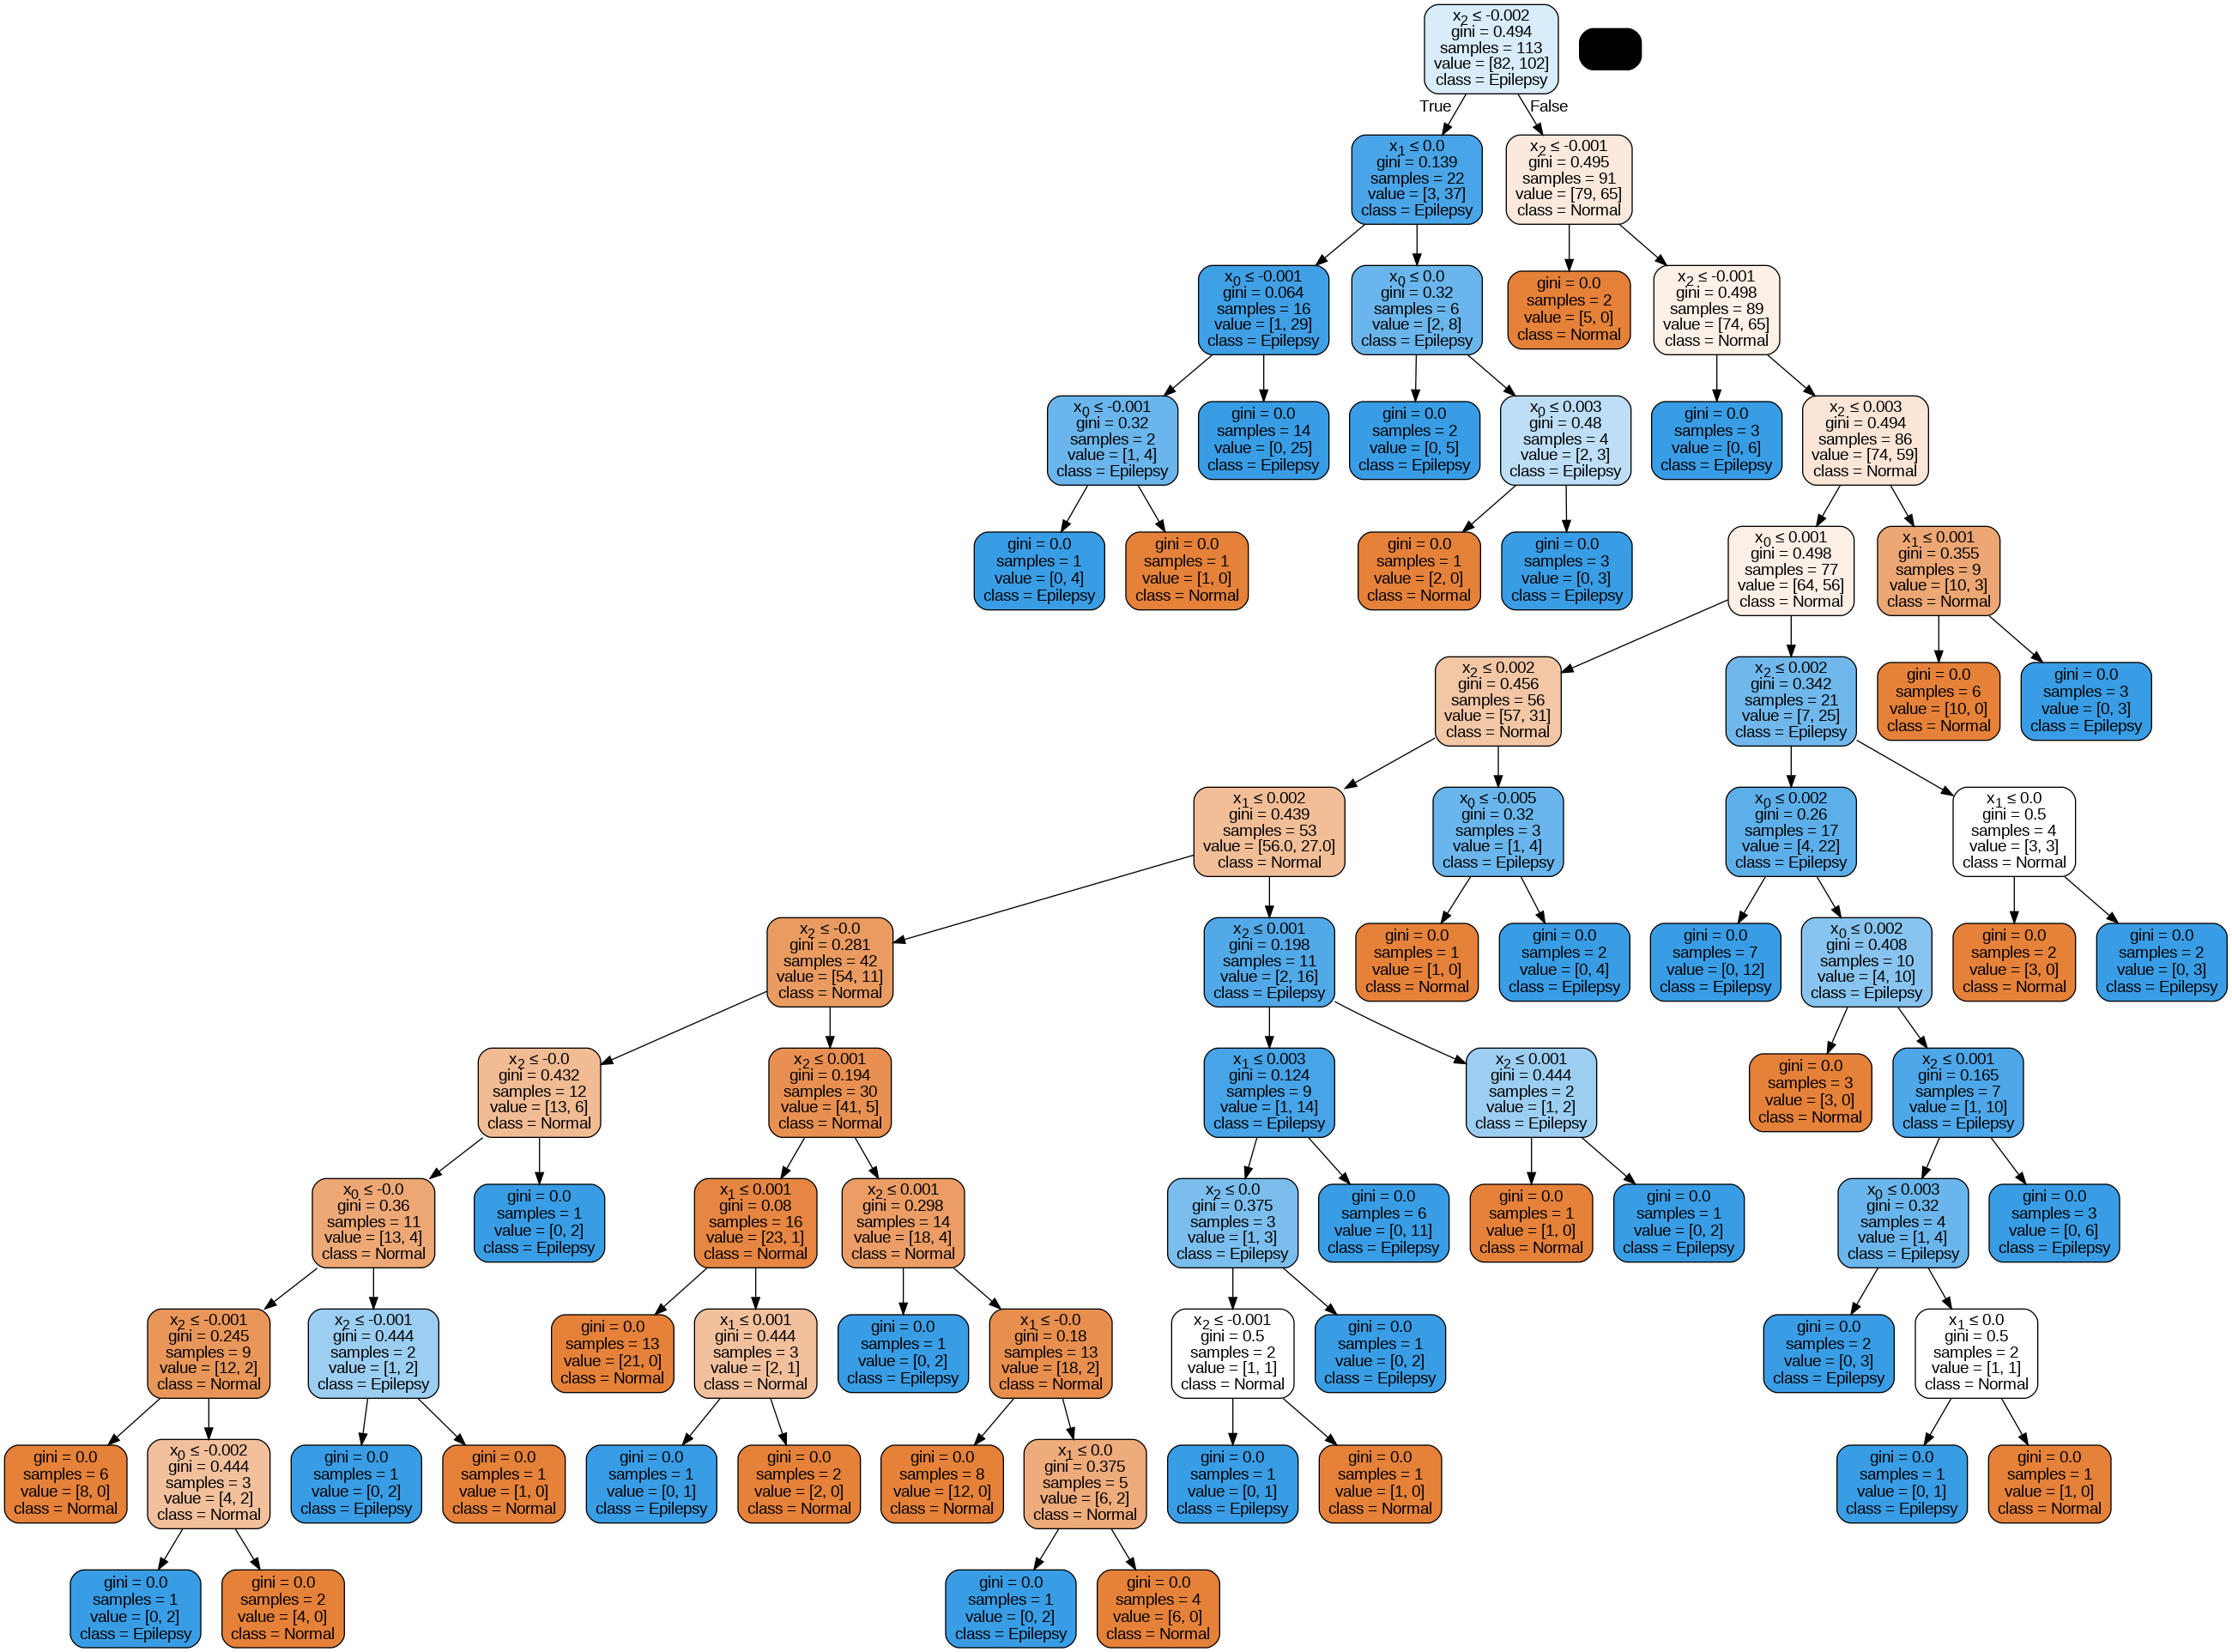

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Pilih salah satu pohon dari Random Forest
tree_to_visualize = rf_classifier.estimators_[4]

# Ekspor pohon ke format DOT
dot_data = export_graphviz(tree_to_visualize, out_file=None,
                           feature_names=None,  # Ganti dengan nama fitur jika Anda ingin menampilkannya
                           class_names=['Normal', 'Epilepsy'],  # Ganti dengan nama kelas
                           filled=True, rounded=True,
                           special_characters=True)

# Buat grafik dari data DOT
graph = pydotplus.graph_from_dot_data(dot_data)

# Tampilkan grafik
Image(graph.create_png())


**LVQ**

In [ ]:
# Fungsi untuk menginisialisasi prototipe
def initialize_prototypes(X_train, y_train, num_classes):
    prototypes = []
    for class_label in range(num_classes):
        # Memilih sampel secara acak dari setiap kelas
        class_samples = X_train[y_train == class_label]
        if class_samples.shape[0] > 0:
            prototype = class_samples[np.random.choice(class_samples.shape[0])]
            prototypes.append(prototype)
    return np.array(prototypes)

# Fungsi untuk menemukan prototipe terdekat
def find_closest_prototype(sample, prototypes):
    distances = np.linalg.norm(prototypes - sample, axis=1)
    return np.argmin(distances)

In [ ]:
# Pelatihan LVQ
def train_lvq(X_train, y_train, learning_rate, epochs):
    num_classes = len(np.unique(y_train))
    prototypes = initialize_prototypes(X_train, y_train, num_classes)
    for epoch in range(epochs):
        for i, sample in enumerate(X_train):
            closest_prototype_idx = find_closest_prototype(sample, prototypes)
            # Access the element at index i using array indexing
            if y_train[i] == closest_prototype_idx:
                prototypes[closest_prototype_idx] += learning_rate * (sample - prototypes[closest_prototype_idx])
            else:
                prototypes[closest_prototype_idx] -= learning_rate * (sample - prototypes[closest_prototype_idx])
    return prototypes

# Melatih model LVQ
prototypes = train_lvq(X_train, y_train, learning_rate=0.001, epochs=100)

In [ ]:
from sklearn.metrics import confusion_matrix

# Fungsi prediksi LVQ
def predict_lvq(X_test, prototypes):
    predictions = []
    for sample in X_test:
        closest_prototype_idx = find_closest_prototype(sample, prototypes)
        predictions.append(closest_prototype_idx)
    return np.array(predictions)

# Membuat prediksi
y_pred = predict_lvq(X_test, prototypes)

akurasi = accuracy_score(y_test, y_pred)
print(f"\nAkurasi: {akurasi * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Akurasi: 86.96%
Confusion Matrix:
[[19  5]
 [ 1 21]]


**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8695652173913043
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        24
           1       0.86      0.86      0.86        22

    accuracy                           0.87        46
   macro avg       0.87      0.87      0.87        46
weighted avg       0.87      0.87      0.87        46

Confusion Matrix:
[[21  3]
 [ 3 19]]


##CLASIFICATION (PCA 4)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(dataset4), data_label, test_size=0.2, random_state=42)

In [ ]:
dataset4

array([[ 2.18981819e-04, -5.46653945e-04, -1.57117735e-03,
         9.60391722e-04],
       [ 1.22674954e-03, -6.61847237e-04, -3.56088434e-05,
         3.38436813e-04],
       [ 1.49232727e-03, -5.25885439e-04,  1.56720511e-03,
         1.10092716e-03],
       [ 1.31480868e-04, -9.34734071e-04,  8.75115447e-04,
         1.32511594e-03],
       [ 1.12521363e-03, -4.07117287e-04, -2.80943700e-03,
        -1.00956486e-03],
       [-5.33162877e-04, -1.69822841e-03, -3.50709099e-03,
        -5.40589149e-04],
       [-4.62800834e-04, -1.49372288e-03, -2.04467088e-03,
         1.75549568e-03],
       [-1.54055723e-03, -2.32389748e-03, -3.31496878e-03,
        -1.23661087e-03],
       [ 1.48160868e-03, -1.24100239e-03,  4.54323040e-04,
        -7.61856278e-04],
       [ 1.98859602e-03, -5.33511241e-04, -9.52412922e-05,
         9.96670295e-04],
       [ 2.36904347e-03, -4.11299195e-05, -2.87867179e-03,
         2.22992133e-04],
       [ 2.63982102e-03, -1.24669871e-03, -3.51346495e-03,
      

In [ ]:
X_test[0]

array([-0.00428203,  0.00044183,  0.000196  , -0.00077984])

In [ ]:
X_train[0]

array([-0.00203193, -0.00082189,  0.00085631, -0.00183618])

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=12)  # You can adjust the number of neighbors

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8913043478260869


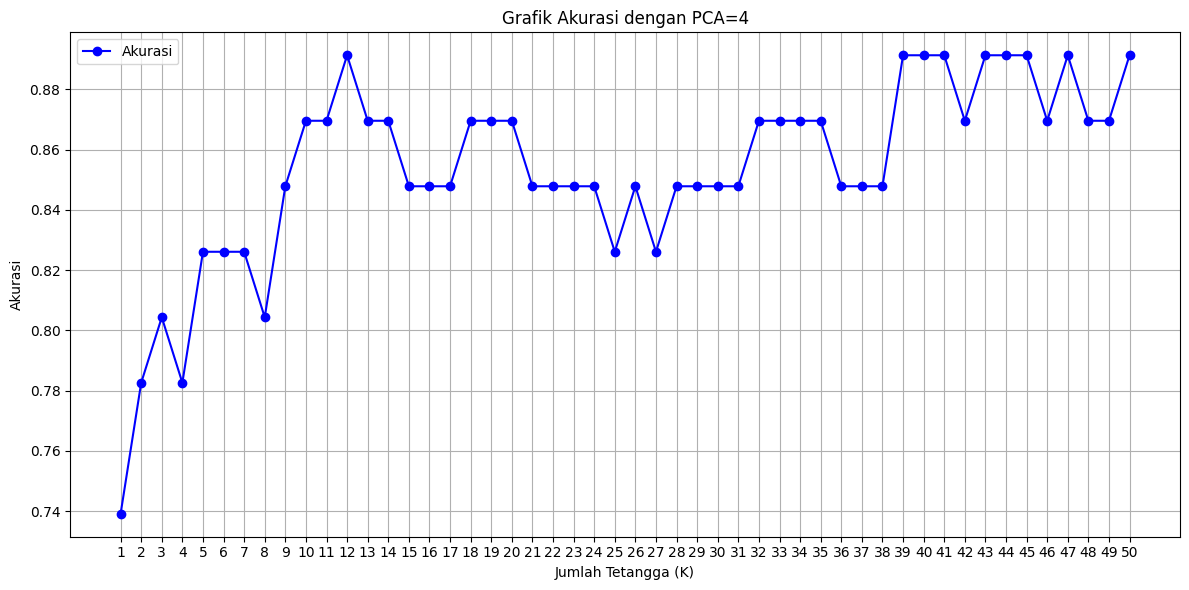

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Rentang nilai K yang akan diuji
k_values = range(1, 51)
accuracies = []

# Iterasi untuk setiap nilai K
for k in k_values:
    # Inisialisasi KNN dengan jumlah tetangga (K) saat ini
    knn = KNeighborsClassifier(n_neighbors=k)
    # Melatih model
    knn.fit(X_train, y_train)
    # Membuat prediksi pada data uji
    y_pred = knn.predict(X_test)
    # Menghitung akurasi
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Membuat grafik akurasi
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', label='Akurasi')
plt.title('Grafik Akurasi dengan PCA=4')
plt.xlabel('Jumlah Tetangga (K)')
plt.ylabel('Akurasi')
plt.xticks(k_values)  # Menampilkan semua nilai K pada sumbu x
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('PCA 4.png', format='png')
plt.show()


In [ ]:
import pandas as pd

# Membuat DataFrame untuk menyimpan nilai K dan akurasinya
accuracy_df = pd.DataFrame({
    'K': k_values,
    'Akurasi': accuracies
})

# Menampilkan tabel akurasi
accuracy_df
# Menyimpan DataFrame ke file Excel
accuracy_df.to_excel('akurasi_knn.xlsx', index=False)

# Menampilkan pesan bahwa file telah disimpan
print("File Excel telah disimpan dengan nama 'akurasi_knn.xlsx'")

File Excel telah disimpan dengan nama 'akurasi_knn.xlsx'


In [ ]:
# Menemukan nilai K dengan akurasi tertinggi
max_accuracy = max(accuracies)
optimal_k = k_values[accuracies.index(max_accuracy)]

# Mencetak hasil
print(f"Akuras tertinggi: {max_accuracy:.2f} pada nilai K: {optimal_k}")


Akuras tertinggi: 0.89 pada nilai K: 12


In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assume X_train, y_train, X_test, and y_test are defined

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=12)  # Adjust the number of neighbors if needed

# Fit the model
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and store Euclidean distances for each test sample against all training samples
results = []
for test_index, test_sample in enumerate(X_test):
    for train_index, train_sample in enumerate(X_train):
        # Calculate Euclidean distance
        euclidean_dist = np.sqrt(np.sum((test_sample - train_sample) ** 2))
        # Store the test and train sample feature values, indices, and distance
        results.append({
            'Test Sample Index': test_index,
            'Test X1': test_sample[0],
            'Test X2': test_sample[1],
            'Test X3': test_sample[2],
            'Test X4': test_sample[3],
            'Training Sample Index': train_index,
            'Train X1': train_sample[0],
            'Train X2': train_sample[1],
            'Train X3': train_sample[2],
            'Train X4': train_sample[3],
            'Euclidean Distance': euclidean_dist
        })

# Convert the results into a DataFrame
distance_df = pd.DataFrame(results)

# Display the table of distances
print("\nEuclidean Distances with Feature Values for Each Test Sample Against All Training Samples:")
print(distance_df)

# Save to Excel for detailed analysis
distance_df.to_excel("knn_all_euclidean_distances_with_features.xlsx", index=False)
print("\nEuclidean distances saved to knn_all_euclidean_distances_with_features.xlsx")


Accuracy: 0.8913043478260869

Euclidean Distances with Feature Values for Each Test Sample Against All Training Samples:
      Test Sample Index   Test X1   Test X2   Test X3   Test X4  \
0                     0 -0.004282  0.000442  0.000196 -0.000780   
1                     0 -0.004282  0.000442  0.000196 -0.000780   
2                     0 -0.004282  0.000442  0.000196 -0.000780   
3                     0 -0.004282  0.000442  0.000196 -0.000780   
4                     0 -0.004282  0.000442  0.000196 -0.000780   
...                 ...       ...       ...       ...       ...   
8459                 45  0.002823  0.000096 -0.002395  0.001512   
8460                 45  0.002823  0.000096 -0.002395  0.001512   
8461                 45  0.002823  0.000096 -0.002395  0.001512   
8462                 45  0.002823  0.000096 -0.002395  0.001512   
8463                 45  0.002823  0.000096 -0.002395  0.001512   

      Training Sample Index  Train X1  Train X2  Train X3  Train X4  \
0  

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assume X_train, y_train, X_test, and y_test are defined

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=12)  # Adjust the number of neighbors if needed

# Fit the model
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Store the results for each test sample in separate sheets
with pd.ExcelWriter("knn_test_results_per_sheet_with_labels.xlsx") as writer:
    for test_index, test_sample in enumerate(X_test):
        # Store data for the current test sample
        results = []
        for train_index, train_sample in enumerate(X_train):
            # Calculate Euclidean distance
            euclidean_dist = np.sqrt(np.sum((test_sample - train_sample) ** 2))
            # Append the data
            results.append({
                'Training Sample Index': train_index,
                'Train X1': train_sample[0],
                'Train X2': train_sample[1],
                'Train X3': train_sample[2],
                'Train X4': train_sample[3],
                'Train Label (y_train)': y_train[train_index],
                'Euclidean Distance': euclidean_dist
            })

        # Create a DataFrame for the current test sample
        results_df = pd.DataFrame(results)
        results_df.insert(0, 'Test Label (y_test)', y_test[test_index])
        results_df.insert(1, 'Test X1', test_sample[0])
        results_df.insert(2, 'Test X2', test_sample[1])
        results_df.insert(3, 'Test X3', test_sample[2])
        results_df.insert(4, 'Test X4', test_sample[3])

        # Write to a separate sheet in the Excel file
        sheet_name = f"Test_Sample_{test_index + 1}"
        results_df.to_excel(writer, sheet_name=sheet_name, index=False)

print("\nEuclidean distances saved to knn_test_results_per_sheet_with_labels.xlsx")


Accuracy: 0.8913043478260869

Euclidean distances saved to knn_test_results_per_sheet_with_labels.xlsx


Confusion Matrix:
[[20  4]
 [ 1 21]]


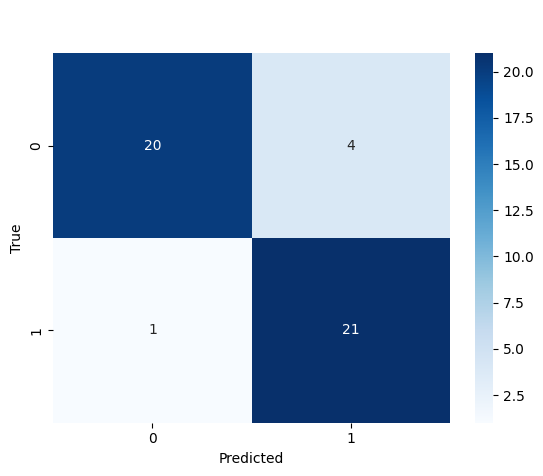

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89        24
           1       0.84      0.95      0.89        22

    accuracy                           0.89        46
   macro avg       0.90      0.89      0.89        46
weighted avg       0.90      0.89      0.89        46



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

# You can also visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('\n')
plt.show()

# Generate the classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)


**SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM model
svm_model = SVC(kernel='poly')  # You can experiment with different kernels (linear, rbf, poly)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


**LVQ**

In [ ]:
# Fungsi untuk menginisialisasi prototipe
def initialize_prototypes(X_train, y_train, num_classes):
    prototypes = []
    for class_label in range(num_classes):
        # Memilih sampel secara acak dari setiap kelas
        class_samples = X_train[y_train == class_label]
        if class_samples.shape[0] > 0:
            prototype = class_samples[np.random.choice(class_samples.shape[0])]
            prototypes.append(prototype)
    return np.array(prototypes)

# Fungsi untuk menemukan prototipe terdekat
def find_closest_prototype(sample, prototypes):
    distances = np.linalg.norm(prototypes - sample, axis=1)
    return np.argmin(distances)


In [ ]:
# Pelatihan LVQ
def train_lvq(X_train, y_train, learning_rate, epochs):
    num_classes = len(np.unique(y_train))
    prototypes = initialize_prototypes(X_train, y_train, num_classes)
    for epoch in range(epochs):
        for i, sample in enumerate(X_train):
            closest_prototype_idx = find_closest_prototype(sample, prototypes)
            # Access the element at index i using array indexing
            if y_train[i] == closest_prototype_idx:
                prototypes[closest_prototype_idx] += learning_rate * (sample - prototypes[closest_prototype_idx])
            else:
                prototypes[closest_prototype_idx] -= learning_rate * (sample - prototypes[closest_prototype_idx])
    return prototypes

# Melatih model LVQ
prototypes = train_lvq(X_train, y_train, learning_rate=0.001, epochs=1000)

In [ ]:
from sklearn.metrics import confusion_matrix

# Fungsi prediksi LVQ
def predict_lvq(X_test, prototypes):
    predictions = []
    for sample in X_test:
        closest_prototype_idx = find_closest_prototype(sample, prototypes)
        predictions.append(closest_prototype_idx)
    return np.array(predictions)

# Membuat prediksi
y_pred = predict_lvq(X_test, prototypes)

akurasi = accuracy_score(y_test, y_pred)
print(f"\nAkurasi: {akurasi * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.8695652173913043


Confusion Matrix:
[[21  3]
 [ 3 19]]


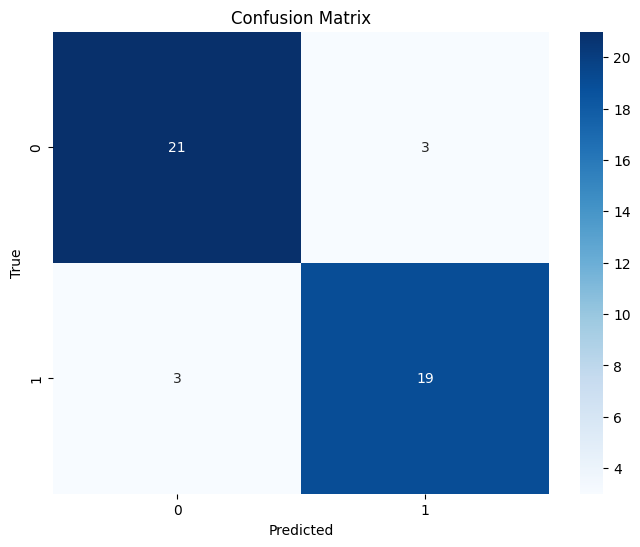

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        24
           1       0.86      0.86      0.86        22

    accuracy                           0.87        46
   macro avg       0.87      0.87      0.87        46
weighted avg       0.87      0.87      0.87        46



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Save the plot as an image
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')  # Save as PNG file
plt.show()

# Generate the classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)


In [ ]:
# Get the probability of each class for each prediction
y_pred_proba = nb_classifier.predict_proba(X_test)

# Create a DataFrame with all feature columns from X_test, and add the actual and predicted labels
results_df = pd.DataFrame(X_test, columns=[f'Feature_{i+1}' for i in range(X_test.shape[1])])

# Add actual labels, predicted labels, and probabilities
results_df['Actual Label'] = y_test
results_df['Predicted Label'] = y_pred

# Add each class's probability as separate columns
for i in range(y_pred_proba.shape[1]):
    results_df[f'Probability_Class_{i}'] = y_pred_proba[:, i]

# Display the table
print("\nDetailed Prediction Results Table:")
print(results_df)

# Optional: Save to Excel
results_df.to_excel("detailed_prediction_results.xlsx", index=False)
print("Detailed prediction results saved to detailed_prediction_results.xlsx")

##CLASIFICATION (PCA 5)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(dataset5), data_label, test_size=0.2, random_state=42)

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8695652173913043


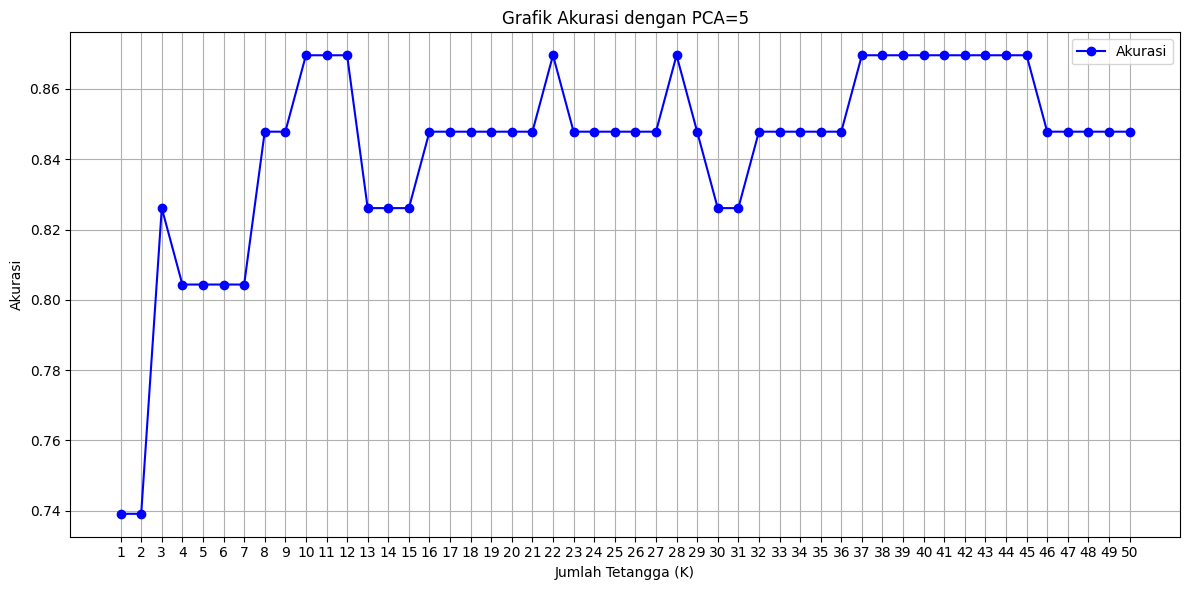

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Rentang nilai K yang akan diuji
k_values = range(1, 51)
accuracies = []

# Iterasi untuk setiap nilai K
for k in k_values:
    # Inisialisasi KNN dengan jumlah tetangga (K) saat ini
    knn = KNeighborsClassifier(n_neighbors=k)
    # Melatih model
    knn.fit(X_train, y_train)
    # Membuat prediksi pada data uji
    y_pred = knn.predict(X_test)
    # Menghitung akurasi
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Membuat grafik akurasi
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', label='Akurasi')
plt.title('Grafik Akurasi dengan PCA=5')
plt.xlabel('Jumlah Tetangga (K)')
plt.ylabel('Akurasi')
plt.xticks(k_values)  # Menampilkan semua nilai K pada sumbu x
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Membuat DataFrame untuk menyimpan nilai K dan akurasinya
accuracy_df = pd.DataFrame({
    'K': k_values,
    'Akurasi': accuracies
})

# Menampilkan tabel akurasi
accuracy_df
# Menyimpan DataFrame ke file Excel
accuracy_df.to_excel('akurasi_knn.xlsx', index=False)

# Menampilkan pesan bahwa file telah disimpan
print("File Excel telah disimpan dengan nama 'akurasi_knn.xlsx'")


File Excel telah disimpan dengan nama 'akurasi_knn.xlsx'


In [ ]:
# Menemukan nilai K dengan akurasi tertinggi
max_accuracy = max(accuracies)
optimal_k = k_values[accuracies.index(max_accuracy)]

# Mencetak hasil
print(f"Akuras tertinggi: {max_accuracy:.2f} pada nilai K: {optimal_k}")


Akuras tertinggi: 0.87 pada nilai K: 10


**SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM model
svm_model = SVC(kernel='rbf')  # You can experiment with different kernels (linear, rbf, poly)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

**LVQ**

In [ ]:
# Fungsi untuk menginisialisasi prototipe
def initialize_prototypes(X_train, y_train, num_classes):
    prototypes = []
    for class_label in range(num_classes):
        # Memilih sampel secara acak dari setiap kelas
        class_samples = X_train[y_train == class_label]
        if class_samples.shape[0] > 0:
            prototype = class_samples[np.random.choice(class_samples.shape[0])]
            prototypes.append(prototype)
    return np.array(prototypes)

# Fungsi untuk menemukan prototipe terdekat
def find_closest_prototype(sample, prototypes):
    distances = np.linalg.norm(prototypes - sample, axis=1)
    return np.argmin(distances)

In [ ]:
# Pelatihan LVQ
def train_lvq(X_train, y_train, learning_rate, epochs):
    num_classes = len(np.unique(y_train))
    prototypes = initialize_prototypes(X_train, y_train, num_classes)
    for epoch in range(epochs):
        for i, sample in enumerate(X_train):
            closest_prototype_idx = find_closest_prototype(sample, prototypes)
            # Access the element at index i using array indexing
            if y_train[i] == closest_prototype_idx:
                prototypes[closest_prototype_idx] += learning_rate * (sample - prototypes[closest_prototype_idx])
            else:
                prototypes[closest_prototype_idx] -= learning_rate * (sample - prototypes[closest_prototype_idx])
    return prototypes

# Melatih model LVQ
prototypes = train_lvq(X_train, y_train, learning_rate=0.001, epochs=1000)

In [ ]:
from sklearn.metrics import confusion_matrix

# Fungsi prediksi LVQ
def predict_lvq(X_test, prototypes):
    predictions = []
    for sample in X_test:
        closest_prototype_idx = find_closest_prototype(sample, prototypes)
        predictions.append(closest_prototype_idx)
    return np.array(predictions)

# Membuat prediksi
y_pred = predict_lvq(X_test, prototypes)

akurasi = accuracy_score(y_test, y_pred)
print(f"\nAkurasi: {akurasi * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

##CLASIFICATION (PCA 6)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(dataset6), data_label, test_size=0.2, random_state=42)

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8695652173913043


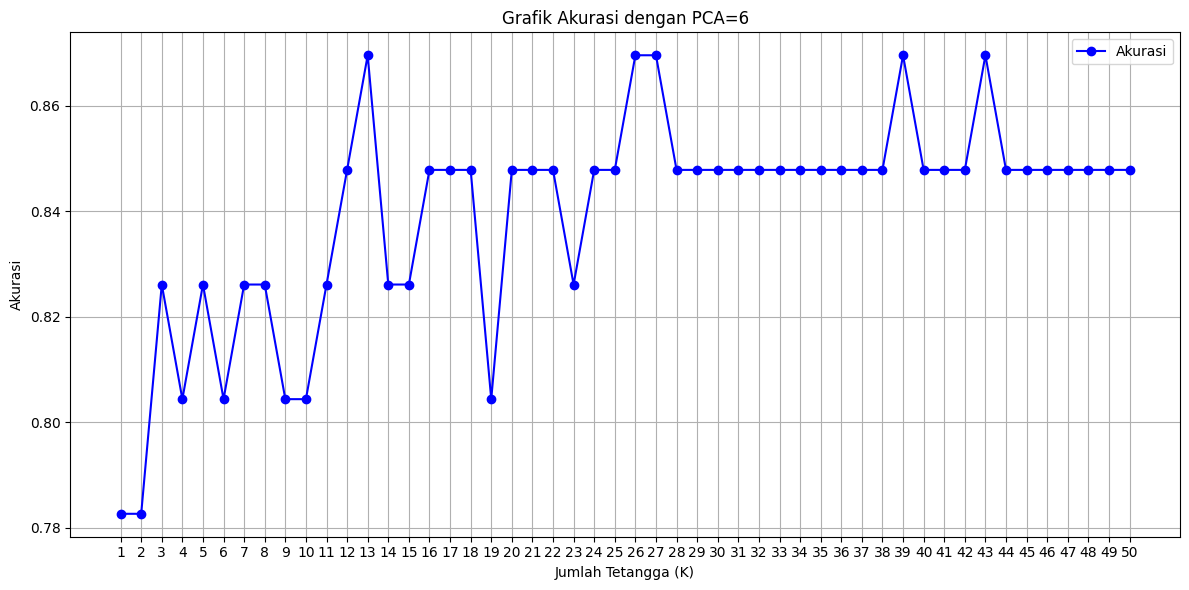

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Rentang nilai K yang akan diuji
k_values = range(1, 51)
accuracies = []

# Iterasi untuk setiap nilai K
for k in k_values:
    # Inisialisasi KNN dengan jumlah tetangga (K) saat ini
    knn = KNeighborsClassifier(n_neighbors=k)
    # Melatih model
    knn.fit(X_train, y_train)
    # Membuat prediksi pada data uji
    y_pred = knn.predict(X_test)
    # Menghitung akurasi
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Membuat grafik akurasi
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', label='Akurasi')
plt.title('Grafik Akurasi dengan PCA=6')
plt.xlabel('Jumlah Tetangga (K)')
plt.ylabel('Akurasi')
plt.xticks(k_values)  # Menampilkan semua nilai K pada sumbu x
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('PCA 6.png', format='png')
plt.show()


In [ ]:
import pandas as pd

# Membuat DataFrame untuk menyimpan nilai K dan akurasinya
accuracy_df = pd.DataFrame({
    'K': k_values,
    'Akurasi': accuracies
})

# Menampilkan tabel akurasi
accuracy_df
# Menyimpan DataFrame ke file Excel
accuracy_df.to_excel('akurasi_knn.xlsx', index=False)

# Menampilkan pesan bahwa file telah disimpan
print("File Excel telah disimpan dengan nama 'akurasi_knn.xlsx'")


File Excel telah disimpan dengan nama 'akurasi_knn.xlsx'


In [ ]:
# Menemukan nilai K dengan akurasi tertinggi
max_accuracy = max(accuracies)
optimal_k = k_values[accuracies.index(max_accuracy)]

# Mencetak hasil
print(f"Akuras tertinggi: {max_accuracy:.2f} pada nilai K: {optimal_k}")


Akuras tertinggi: 0.91 pada nilai K: 118


**SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM model
svm_model = SVC(kernel='rbf')  # You can experiment with different kernels (linear, rbf, poly)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

**LVQ**

In [ ]:
# Fungsi untuk menginisialisasi prototipe
def initialize_prototypes(X_train, y_train, num_classes):
    prototypes = []
    for class_label in range(num_classes):
        # Memilih sampel secara acak dari setiap kelas
        class_samples = X_train[y_train == class_label]
        if class_samples.shape[0] > 0:
            prototype = class_samples[np.random.choice(class_samples.shape[0])]
            prototypes.append(prototype)
    return np.array(prototypes)

# Fungsi untuk menemukan prototipe terdekat
def find_closest_prototype(sample, prototypes):
    distances = np.linalg.norm(prototypes - sample, axis=1)
    return np.argmin(distances)

In [ ]:
# Pelatihan LVQ
def train_lvq(X_train, y_train, learning_rate, epochs):
    num_classes = len(np.unique(y_train))
    prototypes = initialize_prototypes(X_train, y_train, num_classes)
    for epoch in range(epochs):
        for i, sample in enumerate(X_train):
            closest_prototype_idx = find_closest_prototype(sample, prototypes)
            # Access the element at index i using array indexing
            if y_train[i] == closest_prototype_idx:
                prototypes[closest_prototype_idx] += learning_rate * (sample - prototypes[closest_prototype_idx])
            else:
                prototypes[closest_prototype_idx] -= learning_rate * (sample - prototypes[closest_prototype_idx])
    return prototypes

# Melatih model LVQ
prototypes = train_lvq(X_train, y_train, learning_rate=0.001, epochs=1000)

In [ ]:
from sklearn.metrics import confusion_matrix

# Fungsi prediksi LVQ
def predict_lvq(X_test, prototypes):
    predictions = []
    for sample in X_test:
        closest_prototype_idx = find_closest_prototype(sample, prototypes)
        predictions.append(closest_prototype_idx)
    return np.array(predictions)

# Membuat prediksi
y_pred = predict_lvq(X_test, prototypes)

akurasi = accuracy_score(y_test, y_pred)
print(f"\nAkurasi: {akurasi * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

##CLASIFICATION (PCA 7)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(dataset7), data_label, test_size=0.2, random_state=42)

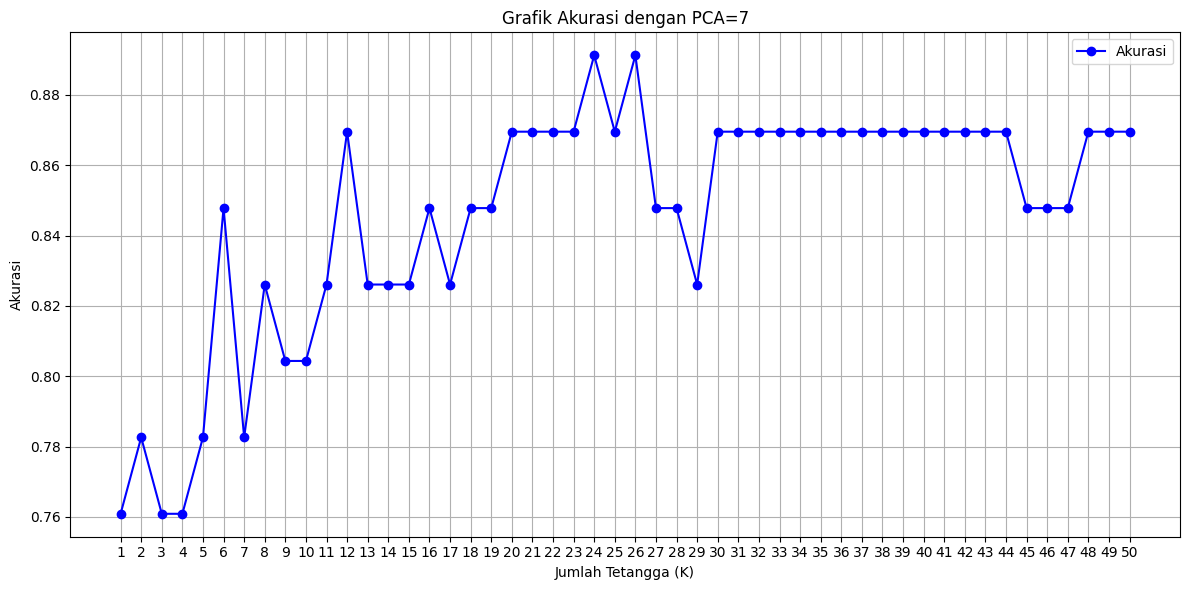

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Rentang nilai K yang akan diuji
k_values = range(1, 51)
accuracies = []

# Iterasi untuk setiap nilai K
for k in k_values:
    # Inisialisasi KNN dengan jumlah tetangga (K) saat ini
    knn = KNeighborsClassifier(n_neighbors=k)
    # Melatih model
    knn.fit(X_train, y_train)
    # Membuat prediksi pada data uji
    y_pred = knn.predict(X_test)
    # Menghitung akurasi
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Membuat grafik akurasi
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', label='Akurasi')
plt.title('Grafik Akurasi dengan PCA=7')
plt.xlabel('Jumlah Tetangga (K)')
plt.ylabel('Akurasi')
plt.xticks(k_values)  # Menampilkan semua nilai K pada sumbu x
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('PCA 7.png', format='png')
plt.show()


In [ ]:
import pandas as pd

# Membuat DataFrame untuk menyimpan nilai K dan akurasinya
accuracy_df = pd.DataFrame({
    'K': k_values,
    'Akurasi': accuracies
})

# Menampilkan tabel akurasi
accuracy_df
# Menyimpan DataFrame ke file Excel
accuracy_df.to_excel('akurasi_knn.xlsx', index=False)

# Menampilkan pesan bahwa file telah disimpan
print("File Excel telah disimpan dengan nama 'akurasi_knn.xlsx'")


File Excel telah disimpan dengan nama 'akurasi_knn.xlsx'


In [ ]:
# Menemukan nilai K dengan akurasi tertinggi
max_accuracy = max(accuracies)
optimal_k = k_values[accuracies.index(max_accuracy)]

# Mencetak hasil
print(f"Akuras tertinggi: {max_accuracy:.2f} pada nilai K: {optimal_k}")


Akuras tertinggi: 0.89 pada nilai K: 24


##CLASIFICATION (PCA 8)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(dataset8), data_label, test_size=0.2, random_state=42)

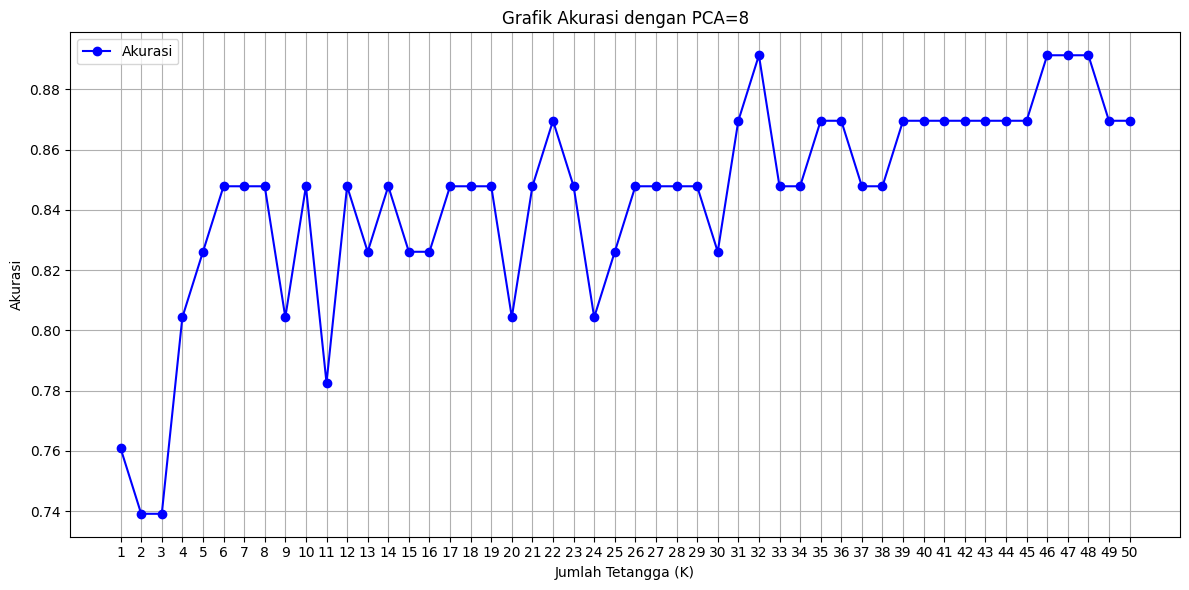

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Rentang nilai K yang akan diuji
k_values = range(1, 51)
accuracies = []

# Iterasi untuk setiap nilai K
for k in k_values:
    # Inisialisasi KNN dengan jumlah tetangga (K) saat ini
    knn = KNeighborsClassifier(n_neighbors=k)
    # Melatih model
    knn.fit(X_train, y_train)
    # Membuat prediksi pada data uji
    y_pred = knn.predict(X_test)
    # Menghitung akurasi
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Membuat grafik akurasi
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', label='Akurasi')
plt.title('Grafik Akurasi dengan PCA=8')
plt.xlabel('Jumlah Tetangga (K)')
plt.ylabel('Akurasi')
plt.xticks(k_values)  # Menampilkan semua nilai K pada sumbu x
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('PCA 8.png', format='png')
plt.show()


In [ ]:
import pandas as pd

# Membuat DataFrame untuk menyimpan nilai K dan akurasinya
accuracy_df = pd.DataFrame({
    'K': k_values,
    'Akurasi': accuracies
})

# Menampilkan tabel akurasi
accuracy_df
# Menyimpan DataFrame ke file Excel
accuracy_df.to_excel('akurasi_knn.xlsx', index=False)

# Menampilkan pesan bahwa file telah disimpan
print("File Excel telah disimpan dengan nama 'akurasi_knn.xlsx'")


File Excel telah disimpan dengan nama 'akurasi_knn.xlsx'


In [ ]:
# Menemukan nilai K dengan akurasi tertinggi
max_accuracy = max(accuracies)
optimal_k = k_values[accuracies.index(max_accuracy)]

# Mencetak hasil
print(f"Akuras tertinggi: {max_accuracy:.2f} pada nilai K: {optimal_k}")


Akuras tertinggi: 0.91 pada nilai K: 98


##CLASIFICATION (PCA 9)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(dataset9), data_label, test_size=0.2, random_state=42)

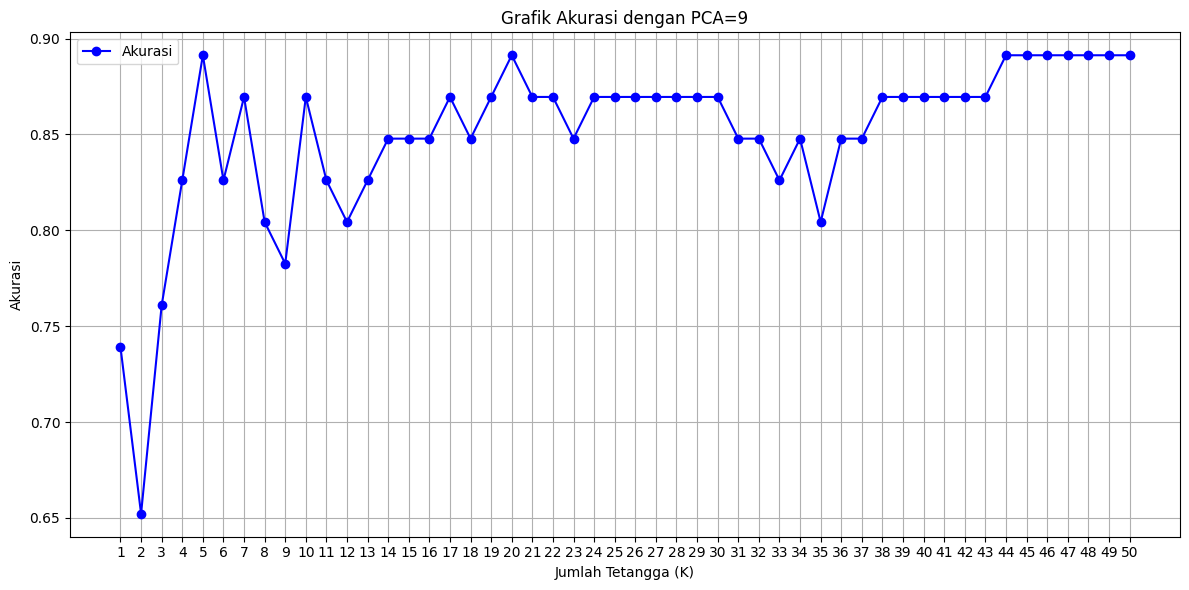

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Rentang nilai K yang akan diuji
k_values = range(1, 51)
accuracies = []

# Iterasi untuk setiap nilai K
for k in k_values:
    # Inisialisasi KNN dengan jumlah tetangga (K) saat ini
    knn = KNeighborsClassifier(n_neighbors=k)
    # Melatih model
    knn.fit(X_train, y_train)
    # Membuat prediksi pada data uji
    y_pred = knn.predict(X_test)
    # Menghitung akurasi
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Membuat grafik akurasi
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', label='Akurasi')
plt.title('Grafik Akurasi dengan PCA=9')
plt.xlabel('Jumlah Tetangga (K)')
plt.ylabel('Akurasi')
plt.xticks(k_values)  # Menampilkan semua nilai K pada sumbu x
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('PCA 9.png', format='png')
plt.show()


In [ ]:
import pandas as pd

# Membuat DataFrame untuk menyimpan nilai K dan akurasinya
accuracy_df = pd.DataFrame({
    'K': k_values,
    'Akurasi': accuracies
})

# Menampilkan tabel akurasi
accuracy_df
# Menyimpan DataFrame ke file Excel
accuracy_df.to_excel('akurasi_knn.xlsx', index=False)

# Menampilkan pesan bahwa file telah disimpan
print("File Excel telah disimpan dengan nama 'akurasi_knn.xlsx'")


File Excel telah disimpan dengan nama 'akurasi_knn.xlsx'


In [ ]:
results_df = pd.DataFrame({'K': k_values, 'Akurasi': accuracies})

# Menampilkan tabel akurasi
print(results_df)

     K   Akurasi
0    1  0.739130
1    2  0.652174
2    3  0.760870
3    4  0.826087
4    5  0.891304
5    6  0.826087
6    7  0.869565
7    8  0.804348
8    9  0.782609
9   10  0.869565
10  11  0.826087
11  12  0.804348
12  13  0.826087
13  14  0.847826
14  15  0.847826
15  16  0.847826
16  17  0.869565
17  18  0.847826
18  19  0.869565
19  20  0.891304
20  21  0.869565
21  22  0.869565
22  23  0.847826
23  24  0.869565
24  25  0.869565
25  26  0.869565
26  27  0.869565
27  28  0.869565
28  29  0.869565
29  30  0.869565
30  31  0.847826
31  32  0.847826
32  33  0.826087
33  34  0.847826
34  35  0.804348
35  36  0.847826
36  37  0.847826
37  38  0.869565
38  39  0.869565
39  40  0.869565
40  41  0.869565
41  42  0.869565
42  43  0.869565
43  44  0.891304
44  45  0.891304
45  46  0.891304
46  47  0.891304
47  48  0.891304
48  49  0.891304
49  50  0.891304


##CLASIFICATION (PCA 10)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(dataset10), data_label, test_size=0.2, random_state=42)

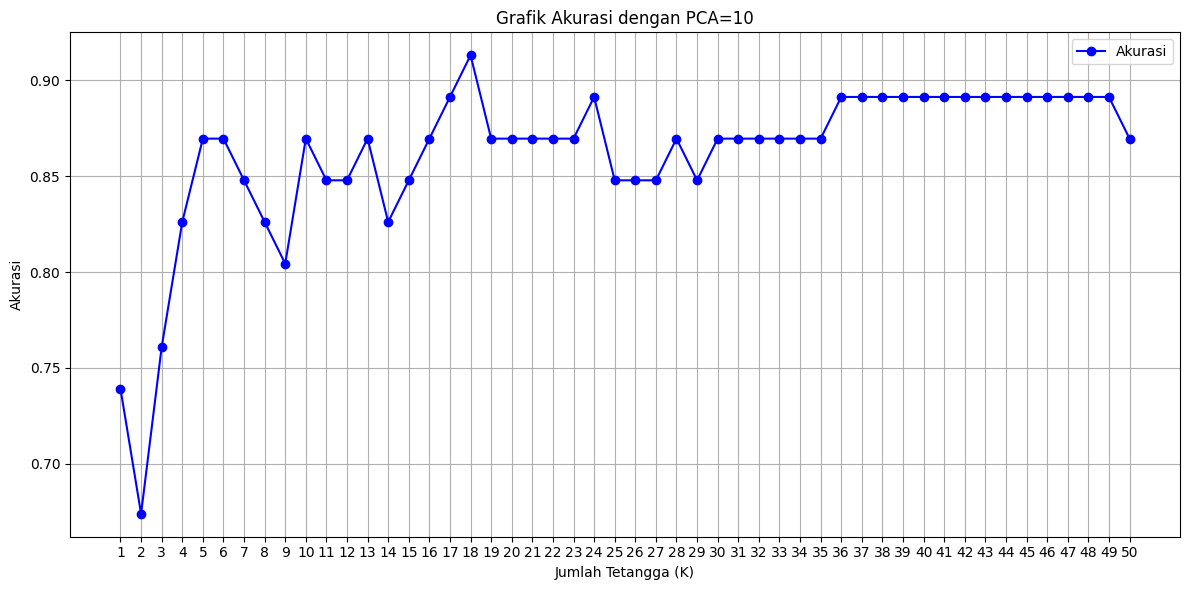

In [ ]:
# Rentang nilai K yang akan diuji
k_values = range(1, 51)
accuracies = []

# Iterasi untuk setiap nilai K
for k in k_values:
    # Inisialisasi KNN dengan jumlah tetangga (K) saat ini
    knn = KNeighborsClassifier(n_neighbors=k)
    # Melatih model
    knn.fit(X_train, y_train)
    # Membuat prediksi pada data uji
    y_pred = knn.predict(X_test)
    # Menghitung akurasi
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Membuat grafik akurasi
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', label='Akurasi')
plt.title('Grafik Akurasi dengan PCA=10')
plt.xlabel('Jumlah Tetangga (K)')
plt.ylabel('Akurasi')
plt.xticks(k_values)  # Menampilkan semua nilai K pada sumbu x
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('PCA 10.png', format='png')
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=18)  # You can adjust the number of neighbors

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9130434782608695


In [ ]:
# Cari tetangga terdekat dan jarak untuk setiap data uji
distances, indices = knn.kneighbors(X_test, n_neighbors=18)

# Buat tabel hasil
results = []
for i, (dist, idx) in enumerate(zip(distances, indices)):
    # Ambil label tetangga dari indeks data latih
    neighbor_labels = y_train[idx]

    # Hitung jumlah IEDs dan Normal
    count_IEDs = sum(label == "IEDs" for label in neighbor_labels)
    count_Normal = sum(label == "Normal" for label in neighbor_labels)

    # Tentukan label prediksi
    predicted_label = "IEDs" if count_IEDs > count_Normal else "Normal"

    # Simpan hasil untuk tabel
    results.append({
        "Data Uji ke-": i + 1,
        "Label Sebenarnya": y_test[i],
        "Jarak ke Tetangga (d)": ", ".join([f"{d:.3f}" for d in dist]),
        "Label Tetangga": ", ".join(map(str, neighbor_labels)),
        "Jumlah IEDs": count_IEDs,
        "Jumlah Normal": count_Normal,
        "Label Prediksi": predicted_label
    })

# Konversi ke DataFrame untuk tabel
df_results = pd.DataFrame(results)

# Tampilkan tabel
print(df_results)

# Simpan tabel ke file Excel/CSV jika diperlukan
df_results.to_csv("knn_results.csv", index=False)  # Simpan sebagai CSV
df_results.to_excel("knn_results.xlsx", index=False)  # Simpan sebagai Excel

    Data Uji ke-  Label Sebenarnya  \
0              1                 0   
1              2                 1   
2              3                 1   
3              4                 0   
4              5                 1   
5              6                 0   
6              7                 1   
7              8                 0   
8              9                 0   
9             10                 0   
10            11                 0   
11            12                 1   
12            13                 1   
13            14                 0   
14            15                 0   
15            16                 0   
16            17                 0   
17            18                 1   
18            19                 0   
19            20                 0   
20            21                 1   
21            22                 0   
22            23                 0   
23            24                 0   
24            25                 0   
25          

In [ ]:
from sklearn.metrics import pairwise_distances

# Calculate distances for each test point
distances = pairwise_distances(X_test, X_train, metric='euclidean')  # Pairwise distances between X_test and X_train
sorted_indices = np.argsort(distances, axis=1)  # Indices of sorted distances for each test point

# Prepare table data
table_data = []

for i, test_point in enumerate(X_test):  # Iterate over each test point
    row = {}
    row["Data Uji ke-"] = i + 1
    row["Label Sebenarnya"] = y_test[i]

    # Collect K nearest distances and their labels
    k_distances = distances[i][sorted_indices[i][:18]]  # 18 nearest distances
    k_labels = y_train[sorted_indices[i][:18]]          # Labels of 18 nearest neighbors

    for k in range(18):
        row[f"Jarak ke K={k+1}"] = k_distances[k]
        row[f"Label Tetangga K={k+1}"] = k_labels[k]

    # Count neighbors in each class
    row["Jumlah Tetangga IEDs"] = np.sum(k_labels == "IEDs")  # Adjust "IEDs" based on your label
    row["Jumlah Tetangga Normal"] = np.sum(k_labels == "Normal")  # Adjust "Normal" based on your label

    # Determine predicted label
    row["Label Prediksi"] = "IEDs" if row["Jumlah Tetangga IEDs"] > row["Jumlah Tetangga Normal"] else "Normal"

    table_data.append(row)

# Convert to DataFrame for display
df = pd.DataFrame(table_data)

# Display or save the table
print(df)
df.to_excel("knn.xlsx", index=False)  # Simpan sebagai Excel

    Data Uji ke-  Label Sebenarnya  Jarak ke K=1  Label Tetangga K=1  \
0              1                 0  2.229135e-03                   0   
1              2                 1  4.422279e-04                   1   
2              3                 1  2.195319e-04                   1   
3              4                 0  2.912267e-03                   0   
4              5                 1  2.367414e-03                   0   
5              6                 0  2.990147e-03                   1   
6              7                 1  2.873647e-03                   1   
7              8                 0  2.087615e-03                   1   
8              9                 0  2.264473e-03                   1   
9             10                 0  2.364190e-03                   0   
10            11                 0  3.938976e-03                   1   
11            12                 1  1.880638e-03                   1   
12            13                 1  2.372084e-03                

In [ ]:
import pandas as pd
import numpy as np

# Data uji pertama
test_data_first = X_test[0]

# Menghitung jarak Euclidean antara data uji pertama dan setiap data latih
distances = []
for i, (train_data, label) in enumerate(zip(X_train, y_train)):
    euclidean_distance = np.sqrt(np.sum((train_data - test_data_first) ** 2))
    distances.append([i + 1] + train_data.tolist() + [label, euclidean_distance])  # Menambahkan indeks, fitur, label, dan jarak

# Membuat DataFrame dengan kolom yang diinginkan
columns = ['Data latih ke-i'] + [f'Fitur {j + 1}' for j in range(X_train.shape[1])] + ['Label', 'Hasil Euclidean']
df_euclidean = pd.DataFrame(distances, columns=columns)

# Menampilkan tabel
print(df_euclidean)


     Data latih ke-i   Fitur 1   Fitur 2   Fitur 3   Fitur 4   Fitur 5  \
0                  1 -0.002032 -0.000822  0.000856 -0.001836  0.000718   
1                  2 -0.002444  0.007214 -0.001759  0.001038  0.001190   
2                  3 -0.000946 -0.002376 -0.000161  0.000661  0.001174   
3                  4  0.005201  0.000149 -0.002366  0.000110 -0.001157   
4                  5 -0.003486 -0.001632  0.000766  0.000561  0.000133   
..               ...       ...       ...       ...       ...       ...   
179              180  0.001371 -0.000410  0.000212  0.000362 -0.001433   
180              181  0.001835 -0.000975 -0.002144 -0.000870 -0.000180   
181              182  0.000881 -0.001485 -0.001985  0.002448 -0.001538   
182              183  0.002270 -0.001115 -0.000829  0.006264  0.006022   
183              184 -0.003097  0.003448 -0.000761 -0.000339  0.000213   

      Fitur 6   Fitur 7   Fitur 8   Fitur 9  Fitur 10  Label  Hasil Euclidean  
0   -0.000732  0.000886 -0.0014

In [ ]:
df_euclidean.to_excel("euclidean.xlsx", index=False)  # Simpan sebagai Excel

In [ ]:
# Menghitung jarak ke K tetangga terdekat dan indeksnya
neighbors = knn.kneighbors(X_test, n_neighbors=18, return_distance=True)

# Membuat tabel hasil
results = []
for i, (distances, indices) in enumerate(zip(*neighbors)):
    # Ambil label dari tetangga terdekat
    neighbor_labels = y_train[indices]

    # Hitung jumlah tetangga dengan label 1 dan 0
    count_label_1 = np.sum(neighbor_labels == 1)
    count_label_0 = np.sum(neighbor_labels == 0)

    # Susun data ke dalam format tabel
    row = {
        "Data uji ke-i": i + 1,
        **{f"Jarak ke K={k+1}": distances[k] for k in range(18)},
        "Jumlah tetangga label 1": count_label_1,
        "Jumlah tetangga label 0": count_label_0,
        "Label asli": y_test[i],
        "Label prediksi": y_pred[i],
    }
    results.append(row)

# Konversi hasil ke DataFrame pandas
results_df = pd.DataFrame(results)

# Simpan hasil ke Excel
results_df.to_excel("KNNNNNNN.xlsx", index=False)
print("Hasil disimpan ke knn_results.xlsx")


Hasil disimpan ke knn_results.xlsx


In [ ]:
# Calculate and store Euclidean distances for each test sample against all training samples
results = []
num_features = X_train.shape[1]  # Dynamically determine the number of features

for test_index, test_sample in enumerate(X_test):
    for train_index, train_sample in enumerate(X_train):
        # Calculate Euclidean distance
        euclidean_dist = np.sqrt(np.sum((test_sample - train_sample) ** 2))

        # Prepare dictionary dynamically
        result = {
            'Test Sample Index': test_index,
            'Training Sample Index': train_index,
            'Euclidean Distance': euclidean_dist
        }

        # Add features dynamically for test and train samples
        for i in range(num_features):
            result[f'Test Feature {i+1}'] = test_sample[i]
            result[f'Train Feature {i+1}'] = train_sample[i]

        # Append the result
        results.append(result)
# Convert the results into a DataFrame
distance_df = pd.DataFrame(results)

# Apply scientific notation formatting to all numeric columns
for col in distance_df.select_dtypes(include=[np.number]).columns:
    distance_df[col] = distance_df[col].apply(lambda x: f"{x:.3e}".replace('e', '×10^').replace('+', ''))

# Display the table of distances
print("\nEuclidean Distances with Feature Values for Each Test Sample Against All Training Samples:")
print(distance_df)

# Save to Excel for detailed analysis
distance_df.to_excel("Hasil Klasifikasi KNN.xlsx", index=False)
print("\nEuclidean distances saved to knn_all_euclidean_distances_with_features.xlsx")


Euclidean Distances with Feature Values for Each Test Sample Against All Training Samples:
     Test Sample Index Training Sample Index Euclidean Distance  \
0          0.000×10^00           0.000×10^00       5.017×10^-03   
1          0.000×10^00           1.000×10^00       8.561×10^-03   
2          0.000×10^00           2.000×10^00       5.683×10^-03   
3          0.000×10^00           3.000×10^00       1.022×10^-02   
4          0.000×10^00           4.000×10^00       3.911×10^-03   
...                ...                   ...                ...   
8459       4.500×10^01           1.790×10^02       4.843×10^-03   
8460       4.500×10^01           1.800×10^02       4.059×10^-03   
8461       4.500×10^01           1.810×10^02       4.517×10^-03   
8462       4.500×10^01           1.820×10^02       8.867×10^-03   
8463       4.500×10^01           1.830×10^02       7.374×10^-03   

     Test Feature 1 Train Feature 1 Test Feature 2 Train Feature 2  \
0     -4.282×10^-03   -2.032×10^-

In [ ]:
# Calculate and store Euclidean distances for each test sample against all training samples
results = []
num_features = X_train.shape[1]  # Dynamically determine the number of features

for test_index, test_sample in enumerate(X_test):
    for train_index, train_sample in enumerate(X_train):
        # Calculate Euclidean distance
        euclidean_dist = np.sqrt(np.sum((test_sample - train_sample) ** 2))

        # Prepare dictionary dynamically
        result = {
            'Test Sample Index': test_index,
            'Training Sample Index': train_index,
            'Euclidean Distance': euclidean_dist,
            'Train Label': y_train[train_index],  # Add the label of the training sample
            'Test Label': y_test[test_index]  # Add the label of the test sample
        }

        # Add features dynamically for test and train samples
        for i in range(num_features):
            result[f'Test Feature {i+1}'] = test_sample[i]
            result[f'Train Feature {i+1}'] = train_sample[i]

        # Append the result
        results.append(result)

# Convert the results into a DataFrame
distance_df = pd.DataFrame(results)

# Apply scientific notation formatting to all numeric columns
for col in distance_df.select_dtypes(include=[np.number]).columns:
    distance_df[col] = distance_df[col].apply(lambda x: f"{x:.3e}".replace('e', '×10^').replace('+', ''))

# Display the table of distances
print("\nEuclidean Distances with Feature Values for Each Test Sample Against All Training Samples:")
print(distance_df)

# Save to Excel for detailed analysis
distance_df.to_excel("Hasil Klasifikasi KNN dengan label.xlsx", index=False)
print("\nEuclidean distances saved to Hasil Klasifikasi KNN.xlsx")



Euclidean Distances with Feature Values for Each Test Sample Against All Training Samples:
     Test Sample Index Training Sample Index Euclidean Distance  Train Label  \
0          0.000×10^00           0.000×10^00       5.017×10^-03  0.000×10^00   
1          0.000×10^00           1.000×10^00       8.563×10^-03  1.000×10^00   
2          0.000×10^00           2.000×10^00       5.682×10^-03  0.000×10^00   
3          0.000×10^00           3.000×10^00       1.022×10^-02  1.000×10^00   
4          0.000×10^00           4.000×10^00       3.911×10^-03  0.000×10^00   
...                ...                   ...                ...          ...   
8459       4.500×10^01           1.790×10^02       4.844×10^-03  1.000×10^00   
8460       4.500×10^01           1.800×10^02       4.059×10^-03  1.000×10^00   
8461       4.500×10^01           1.810×10^02       4.517×10^-03  1.000×10^00   
8462       4.500×10^01           1.820×10^02       8.867×10^-03  0.000×10^00   
8463       4.500×10^01      

In [ ]:
from collections import Counter

# Calculate and store Euclidean distances for each test sample against all training samples
results = []
num_features = X_train.shape[1]  # Dynamically determine the number of features

for test_index, test_sample in enumerate(X_test):
    distances = []
    for train_index, train_sample in enumerate(X_train):
        # Calculate Euclidean distance
        euclidean_dist = np.sqrt(np.sum((test_sample - train_sample) ** 2))
        distances.append({
            'Training Sample Index': train_index,
            'Euclidean Distance': euclidean_dist,
            'Training Label': y_train[train_index],  # Add label from training data
            **{f'Train Feature {i+1}': train_sample[i] for i in range(num_features)}
        })

    # Sort distances and take the 18 nearest neighbors
    sorted_neighbors = sorted(distances, key=lambda x: x['Euclidean Distance'])[:18]

    # Determine the prediction label by majority vote from the nearest neighbors
    neighbor_labels = [neighbor['Training Label'] for neighbor in sorted_neighbors]
    prediction_label = Counter(neighbor_labels).most_common(1)[0][0]  # Majority vote

    # Add results to the main results list
    for neighbor in sorted_neighbors:
        result = {
            'Test Sample Index': test_index,
            'True Test Label': y_test[test_index],  # Add true label from test data
            **{f'Test Feature {i+1}': test_sample[i] for i in range(num_features)},
            'Prediction Label': prediction_label,  # Add the prediction label
            **neighbor
        }
        results.append(result)

# Convert the results into a DataFrame
distance_df = pd.DataFrame(results)

# Apply scientific notation formatting to all numeric columns
for col in distance_df.select_dtypes(include=[np.number]).columns:
    distance_df[col] = distance_df[col].apply(lambda x: f"{x:.3e}".replace('e', '×10^').replace('+', ''))

# Display the table of distances
print("\n18 Nearest Neighbors for Each Test Sample with Labels and Predictions:")
print(distance_df)

# Save to Excel for detailed analysis
distance_df.to_excel("knn_18_nearest_neighbors_with_labels_and_predictions.xlsx", index=False)
print("\n18 nearest neighbors with labels and predictions saved to knn_18_nearest_neighbors_with_labels_and_predictions.xlsx")



18 Nearest Neighbors for Each Test Sample with Labels and Predictions:
    Test Sample Index True Test Label Test Feature 1 Test Feature 2  \
0         0.000×10^00     0.000×10^00  -4.282×10^-03   4.418×10^-04   
1         0.000×10^00     0.000×10^00  -4.282×10^-03   4.418×10^-04   
2         0.000×10^00     0.000×10^00  -4.282×10^-03   4.418×10^-04   
3         0.000×10^00     0.000×10^00  -4.282×10^-03   4.418×10^-04   
4         0.000×10^00     0.000×10^00  -4.282×10^-03   4.418×10^-04   
..                ...             ...            ...            ...   
823       4.500×10^01     1.000×10^00   2.823×10^-03   9.632×10^-05   
824       4.500×10^01     1.000×10^00   2.823×10^-03   9.632×10^-05   
825       4.500×10^01     1.000×10^00   2.823×10^-03   9.632×10^-05   
826       4.500×10^01     1.000×10^00   2.823×10^-03   9.632×10^-05   
827       4.500×10^01     1.000×10^00   2.823×10^-03   9.632×10^-05   

    Test Feature 3 Test Feature 4 Test Feature 5 Test Feature 6  \
0     1.

Confusion Matrix:
[[21  3]
 [ 1 21]]


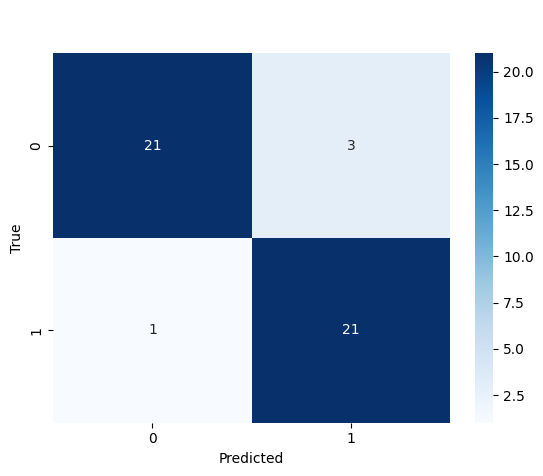

<Figure size 640x480 with 0 Axes>

In [ ]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('\n')
plt.show()

cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)


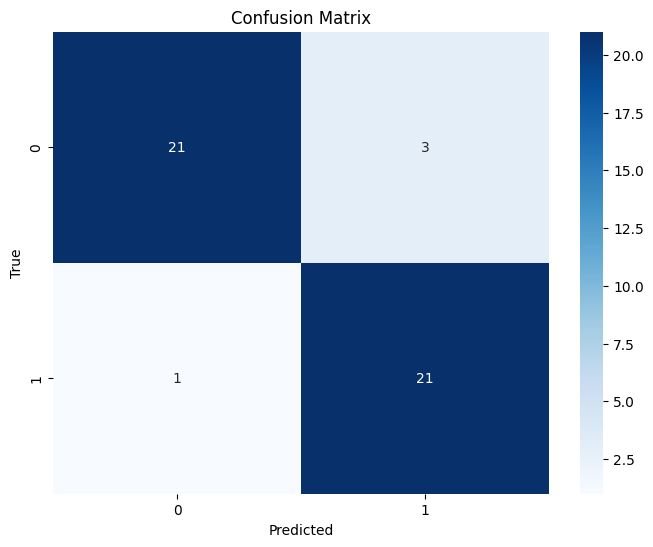

In [ ]:
# Assuming 'cm' is the confusion matrix from the previous code
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix') #Added title
plt.savefig('confusion_matrix.png') #Saves the plot as a png
plt.show()

In [ ]:
# Generate the classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        24
           1       0.88      0.95      0.91        22

    accuracy                           0.91        46
   macro avg       0.91      0.91      0.91        46
weighted avg       0.92      0.91      0.91        46



In [ ]:
# Convert the classification report to a pandas DataFrame
cr_df = pd.DataFrame(cr).transpose()

# Plot the classification report
plt.figure(figsize=(8, 6))
sns.heatmap(cr_df.iloc[:-1, :].T, annot=True, cmap='Blues', fmt='.2f', cbar=False)
plt.title("Classification Report")

# Save the plot to a BytesIO object
buf = io.BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)

# Convert BytesIO to image
image = Image.open(buf)

# Save the image as a file
image.save('/mnt/data/classification_report.png')

# Optionally, display the image
image.show()

ValueError: DataFrame constructor not properly called!

In [ ]:
import pandas as pd

# Membuat DataFrame untuk menyimpan nilai K dan akurasinya
accuracy_df = pd.DataFrame({
    'K': k_values,
    'Akurasi': accuracies
})

# Menampilkan tabel akurasi
accuracy_df
# Menyimpan DataFrame ke file Excel
accuracy_df.to_excel('akurasi_knn.xlsx', index=False)

# Menampilkan pesan bahwa file telah disimpan
print("File Excel telah disimpan dengan nama 'akurasi_knn.xlsx'")


File Excel telah disimpan dengan nama 'akurasi_knn.xlsx'


#**USING NORMALITAZION**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Sesuaikan scaler dengan data Anda dan transformasikan data
normalized_data = scaler.fit_transform(data)

print(normalized_data)


[[0.32538897 0.32538897 0.30526194 ... 0.08723164 0.03523933 0.0275424 ]
 [0.29752002 0.29752002 0.23645559 ... 0.14849654 0.12040335 0.09094342]
 [0.42249663 0.42249663 0.24589098 ... 0.07747316 0.10664028 0.10406997]
 ...
 [0.03820743 0.03820743 0.03499987 ... 0.17937876 0.06265784 0.02026064]
 [0.15231417 0.15231417 0.12512218 ... 0.27014006 0.16795118 0.09290521]
 [0.07107414 0.07107414 0.06850898 ... 0.10564246 0.05592793 0.04159515]]


In [ ]:
from sklearn.decomposition import PCA

# PCA transformation
pca5 = PCA(n_components=4)
dataset5 = pca5.fit_transform(normalized_data)

In [ ]:
from sklearn.decomposition import PCA

pca6 = PCA(n_components=5)
dataset6 = pca6.fit_transform(normalized_data)

In [ ]:
from sklearn.decomposition import PCA

pca7 = PCA(n_components=6)
dataset7 = pca7.fit_transform(normalized_data)

##CLASIFICATION (NO USING PCA)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(normalized_data), data_label, test_size=0.2, random_state=42)

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=16)  # You can adjust the number of neighbors

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8043478260869565


Confusion Matrix:
[[19  5]
 [ 4 18]]


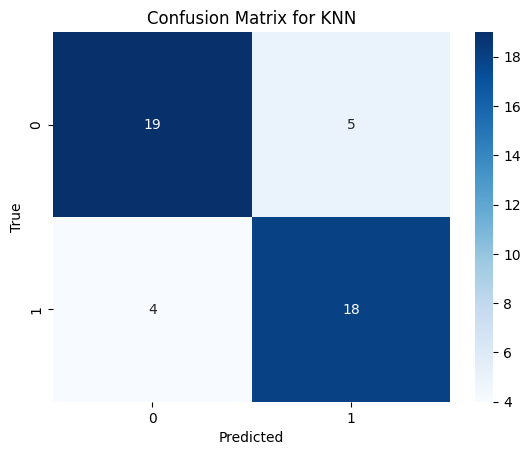

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        24
           1       0.78      0.82      0.80        22

    accuracy                           0.80        46
   macro avg       0.80      0.80      0.80        46
weighted avg       0.81      0.80      0.80        46



In [ ]:
# prompt: create confusion matrix and classification_report KNN

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

# You can also visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for KNN')
plt.show()

# Generate the classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)


**SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM model
svm_model = SVC(kernel='poly')  # You can experiment with different kernels (linear, rbf, poly)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8043478260869565


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8478260869565217


**LVQ**

In [ ]:
# Fungsi untuk menginisialisasi prototipe
def initialize_prototypes(X_train, y_train, num_classes):
    prototypes = []
    for class_label in range(num_classes):
        # Memilih sampel secara acak dari setiap kelas
        class_samples = X_train[y_train == class_label]
        if class_samples.shape[0] > 0:
            prototype = class_samples[np.random.choice(class_samples.shape[0])]
            prototypes.append(prototype)
    return np.array(prototypes)

# Fungsi untuk menemukan prototipe terdekat
def find_closest_prototype(sample, prototypes):
    distances = np.linalg.norm(prototypes - sample, axis=1)
    return np.argmin(distances)


In [ ]:
# Pelatihan LVQ
def train_lvq(X_train, y_train, learning_rate, epochs):
    num_classes = len(np.unique(y_train))
    prototypes = initialize_prototypes(X_train, y_train, num_classes)
    for epoch in range(epochs):
        for i, sample in enumerate(X_train):
            closest_prototype_idx = find_closest_prototype(sample, prototypes)
            # Access the element at index i using array indexing
            if y_train[i] == closest_prototype_idx:
                prototypes[closest_prototype_idx] += learning_rate * (sample - prototypes[closest_prototype_idx])
            else:
                prototypes[closest_prototype_idx] -= learning_rate * (sample - prototypes[closest_prototype_idx])
    return prototypes

# Melatih model LVQ
prototypes = train_lvq(X_train, y_train, learning_rate=0.001, epochs=1000)

In [ ]:
from sklearn.metrics import confusion_matrix

# Fungsi prediksi LVQ
def predict_lvq(X_test, prototypes):
    predictions = []
    for sample in X_test:
        closest_prototype_idx = find_closest_prototype(sample, prototypes)
        predictions.append(closest_prototype_idx)
    return np.array(predictions)

# Membuat prediksi
y_pred = predict_lvq(X_test, prototypes)

akurasi = accuracy_score(y_test, y_pred)
print(f"\nAkurasi: {akurasi * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Akurasi: 76.09%
Confusion Matrix:
[[16  8]
 [ 3 19]]


**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.5869565217391305
              precision    recall  f1-score   support

           0       0.62      0.54      0.58        24
           1       0.56      0.64      0.60        22

    accuracy                           0.59        46
   macro avg       0.59      0.59      0.59        46
weighted avg       0.59      0.59      0.59        46

Confusion Matrix:
[[13 11]
 [ 8 14]]


##CLASIFICATION (PCA 4)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(dataset5), data_label, test_size=0.2, random_state=42)

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Loop untuk nilai n_neighbors dari 1 hingga 100
for n in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"n_neighbors = {n}, Accuracy: {accuracy}")


n_neighbors = 1, Accuracy: 0.6739130434782609
n_neighbors = 2, Accuracy: 0.782608695652174
n_neighbors = 3, Accuracy: 0.6956521739130435
n_neighbors = 4, Accuracy: 0.6956521739130435
n_neighbors = 5, Accuracy: 0.717391304347826
n_neighbors = 6, Accuracy: 0.7391304347826086
n_neighbors = 7, Accuracy: 0.7608695652173914
n_neighbors = 8, Accuracy: 0.7608695652173914
n_neighbors = 9, Accuracy: 0.717391304347826
n_neighbors = 10, Accuracy: 0.6739130434782609
n_neighbors = 11, Accuracy: 0.717391304347826
n_neighbors = 12, Accuracy: 0.7391304347826086
n_neighbors = 13, Accuracy: 0.7391304347826086
n_neighbors = 14, Accuracy: 0.782608695652174
n_neighbors = 15, Accuracy: 0.717391304347826
n_neighbors = 16, Accuracy: 0.7608695652173914
n_neighbors = 17, Accuracy: 0.7391304347826086
n_neighbors = 18, Accuracy: 0.6956521739130435
n_neighbors = 19, Accuracy: 0.6956521739130435
n_neighbors = 20, Accuracy: 0.717391304347826
n_neighbors = 21, Accuracy: 0.7391304347826086
n_neighbors = 22, Accuracy: 0

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=36)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8913043478260869


**SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM model
svm_model = SVC(kernel='rbf')  # You can experiment with different kernels (linear, rbf, poly)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8478260869565217


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=5, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8478260869565217


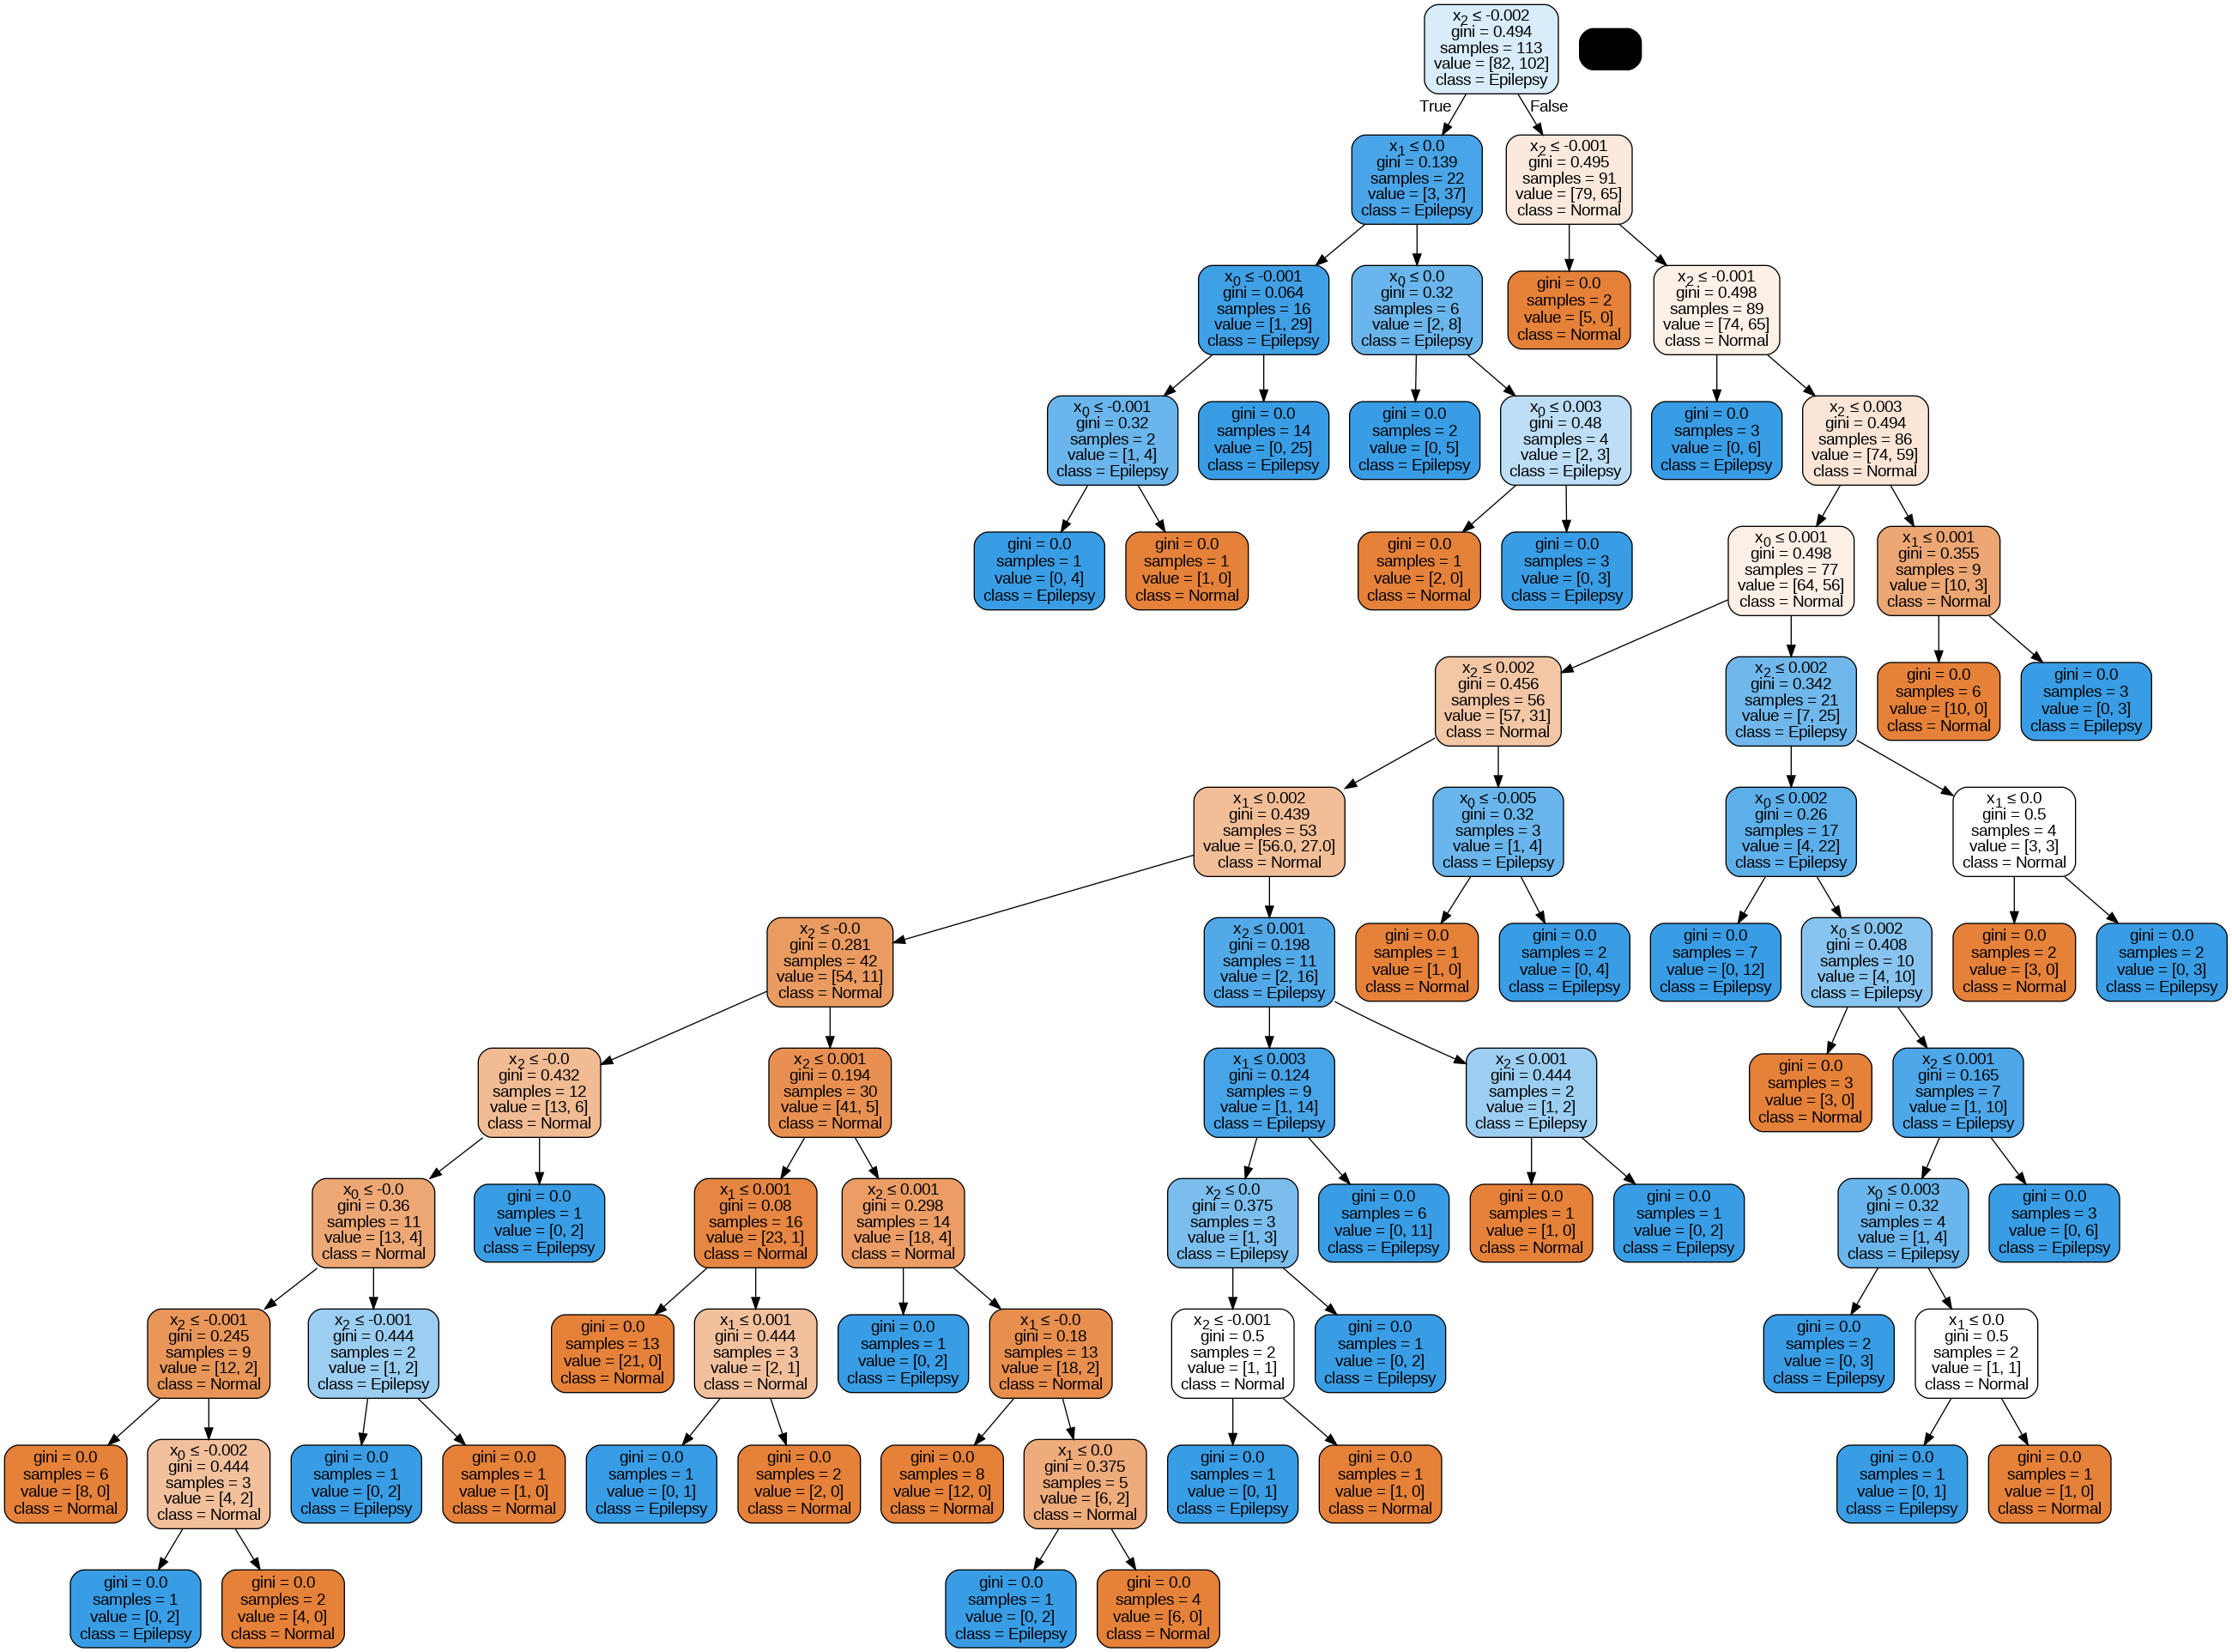

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Pilih salah satu pohon dari Random Forest
tree_to_visualize = rf_classifier.estimators_[4]

# Ekspor pohon ke format DOT
dot_data = export_graphviz(tree_to_visualize, out_file=None,
                           feature_names=None,  # Ganti dengan nama fitur jika Anda ingin menampilkannya
                           class_names=['Normal', 'Epilepsy'],  # Ganti dengan nama kelas
                           filled=True, rounded=True,
                           special_characters=True)

# Buat grafik dari data DOT
graph = pydotplus.graph_from_dot_data(dot_data)

# Tampilkan grafik
Image(graph.create_png())


**LVQ**

In [ ]:
# Fungsi untuk menginisialisasi prototipe
def initialize_prototypes(X_train, y_train, num_classes):
    prototypes = []
    for class_label in range(num_classes):
        # Memilih sampel secara acak dari setiap kelas
        class_samples = X_train[y_train == class_label]
        if class_samples.shape[0] > 0:
            prototype = class_samples[np.random.choice(class_samples.shape[0])]
            prototypes.append(prototype)
    return np.array(prototypes)

# Fungsi untuk menemukan prototipe terdekat
def find_closest_prototype(sample, prototypes):
    distances = np.linalg.norm(prototypes - sample, axis=1)
    return np.argmin(distances)

In [ ]:
# Pelatihan LVQ
def train_lvq(X_train, y_train, learning_rate, epochs):
    num_classes = len(np.unique(y_train))
    prototypes = initialize_prototypes(X_train, y_train, num_classes)
    for epoch in range(epochs):
        for i, sample in enumerate(X_train):
            closest_prototype_idx = find_closest_prototype(sample, prototypes)
            # Access the element at index i using array indexing
            if y_train[i] == closest_prototype_idx:
                prototypes[closest_prototype_idx] += learning_rate * (sample - prototypes[closest_prototype_idx])
            else:
                prototypes[closest_prototype_idx] -= learning_rate * (sample - prototypes[closest_prototype_idx])
    return prototypes

# Melatih model LVQ
prototypes = train_lvq(X_train, y_train, learning_rate=0.001, epochs=100)

In [ ]:
from sklearn.metrics import confusion_matrix

# Fungsi prediksi LVQ
def predict_lvq(X_test, prototypes):
    predictions = []
    for sample in X_test:
        closest_prototype_idx = find_closest_prototype(sample, prototypes)
        predictions.append(closest_prototype_idx)
    return np.array(predictions)

# Membuat prediksi
y_pred = predict_lvq(X_test, prototypes)

akurasi = accuracy_score(y_test, y_pred)
print(f"\nAkurasi: {akurasi * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Akurasi: 86.96%
Confusion Matrix:
[[19  5]
 [ 1 21]]


**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8695652173913043
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        24
           1       0.86      0.86      0.86        22

    accuracy                           0.87        46
   macro avg       0.87      0.87      0.87        46
weighted avg       0.87      0.87      0.87        46

Confusion Matrix:
[[21  3]
 [ 3 19]]


##CLASIFICATION (PCA 5)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(dataset6), data_label, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(184, 5)

In [ ]:
X_test.shape

(46, 5)

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=12)  # You can adjust the number of neighbors

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7391304347826086


Confusion Matrix:
[[12 12]
 [ 3 19]]


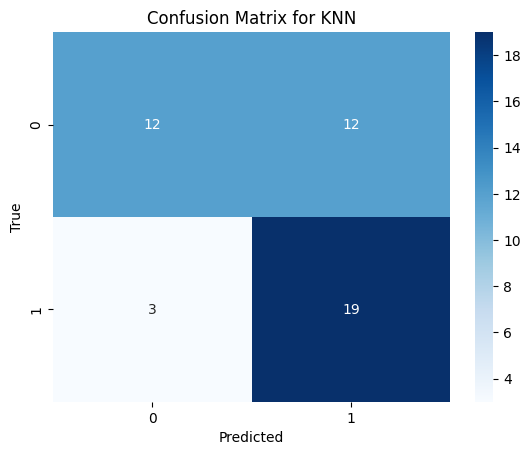

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.50      0.62        24
           1       0.61      0.86      0.72        22

    accuracy                           0.67        46
   macro avg       0.71      0.68      0.67        46
weighted avg       0.71      0.67      0.66        46



In [ ]:
# prompt: create confusion matrix and classification_report KNN

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

# You can also visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for KNN')
plt.show()

# Generate the classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)


**SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM model
svm_model = SVC(kernel='poly')  # You can experiment with different kernels (linear, rbf, poly)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6739130434782609


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7608695652173914


**LVQ**

In [ ]:
# Fungsi untuk menginisialisasi prototipe
def initialize_prototypes(X_train, y_train, num_classes):
    prototypes = []
    for class_label in range(num_classes):
        # Memilih sampel secara acak dari setiap kelas
        class_samples = X_train[y_train == class_label]
        if class_samples.shape[0] > 0:
            prototype = class_samples[np.random.choice(class_samples.shape[0])]
            prototypes.append(prototype)
    return np.array(prototypes)

# Fungsi untuk menemukan prototipe terdekat
def find_closest_prototype(sample, prototypes):
    distances = np.linalg.norm(prototypes - sample, axis=1)
    return np.argmin(distances)


In [ ]:
# Pelatihan LVQ
def train_lvq(X_train, y_train, learning_rate, epochs):
    num_classes = len(np.unique(y_train))
    prototypes = initialize_prototypes(X_train, y_train, num_classes)
    for epoch in range(epochs):
        for i, sample in enumerate(X_train):
            closest_prototype_idx = find_closest_prototype(sample, prototypes)
            # Access the element at index i using array indexing
            if y_train[i] == closest_prototype_idx:
                prototypes[closest_prototype_idx] += learning_rate * (sample - prototypes[closest_prototype_idx])
            else:
                prototypes[closest_prototype_idx] -= learning_rate * (sample - prototypes[closest_prototype_idx])
    return prototypes

# Melatih model LVQ
prototypes = train_lvq(X_train, y_train, learning_rate=0.001, epochs=1000)

In [ ]:
from sklearn.metrics import confusion_matrix

# Fungsi prediksi LVQ
def predict_lvq(X_test, prototypes):
    predictions = []
    for sample in X_test:
        closest_prototype_idx = find_closest_prototype(sample, prototypes)
        predictions.append(closest_prototype_idx)
    return np.array(predictions)

# Membuat prediksi
y_pred = predict_lvq(X_test, prototypes)

akurasi = accuracy_score(y_test, y_pred)
print(f"\nAkurasi: {akurasi * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Akurasi: 73.91%
Confusion Matrix:
[[15  9]
 [ 3 19]]


**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.717391304347826
              precision    recall  f1-score   support

           0       0.79      0.62      0.70        24
           1       0.67      0.82      0.73        22

    accuracy                           0.72        46
   macro avg       0.73      0.72      0.72        46
weighted avg       0.73      0.72      0.72        46

Confusion Matrix:
[[15  9]
 [ 4 18]]


##CLASIFICATION (PCA 6)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(dataset7), data_label, test_size=0.2, random_state=42)

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Loop untuk nilai n_neighbors dari 1 hingga 100
for n in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"n_neighbors = {n}, Accuracy: {accuracy}")


n_neighbors = 1, Accuracy: 0.7608695652173914
n_neighbors = 2, Accuracy: 0.782608695652174
n_neighbors = 3, Accuracy: 0.7391304347826086
n_neighbors = 4, Accuracy: 0.7608695652173914
n_neighbors = 5, Accuracy: 0.782608695652174
n_neighbors = 6, Accuracy: 0.8043478260869565
n_neighbors = 7, Accuracy: 0.782608695652174
n_neighbors = 8, Accuracy: 0.717391304347826
n_neighbors = 9, Accuracy: 0.782608695652174
n_neighbors = 10, Accuracy: 0.8043478260869565
n_neighbors = 11, Accuracy: 0.782608695652174
n_neighbors = 12, Accuracy: 0.8043478260869565
n_neighbors = 13, Accuracy: 0.782608695652174
n_neighbors = 14, Accuracy: 0.7391304347826086
n_neighbors = 15, Accuracy: 0.7391304347826086
n_neighbors = 16, Accuracy: 0.8043478260869565
n_neighbors = 17, Accuracy: 0.8478260869565217
n_neighbors = 18, Accuracy: 0.8913043478260869
n_neighbors = 19, Accuracy: 0.8695652173913043
n_neighbors = 20, Accuracy: 0.8913043478260869
n_neighbors = 21, Accuracy: 0.8913043478260869
n_neighbors = 22, Accuracy: 0

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8913043478260869


**SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM model
svm_model = SVC(kernel='rbf')  # You can experiment with different kernels (linear, rbf, poly)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7608695652173914


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.782608695652174


**LVQ**

In [ ]:
# Fungsi untuk menginisialisasi prototipe
def initialize_prototypes(X_train, y_train, num_classes):
    prototypes = []
    for class_label in range(num_classes):
        # Memilih sampel secara acak dari setiap kelas
        class_samples = X_train[y_train == class_label]
        if class_samples.shape[0] > 0:
            prototype = class_samples[np.random.choice(class_samples.shape[0])]
            prototypes.append(prototype)
    return np.array(prototypes)

# Fungsi untuk menemukan prototipe terdekat
def find_closest_prototype(sample, prototypes):
    distances = np.linalg.norm(prototypes - sample, axis=1)
    return np.argmin(distances)

In [ ]:
# Pelatihan LVQ
def train_lvq(X_train, y_train, learning_rate, epochs):
    num_classes = len(np.unique(y_train))
    prototypes = initialize_prototypes(X_train, y_train, num_classes)
    for epoch in range(epochs):
        for i, sample in enumerate(X_train):
            closest_prototype_idx = find_closest_prototype(sample, prototypes)
            # Access the element at index i using array indexing
            if y_train[i] == closest_prototype_idx:
                prototypes[closest_prototype_idx] += learning_rate * (sample - prototypes[closest_prototype_idx])
            else:
                prototypes[closest_prototype_idx] -= learning_rate * (sample - prototypes[closest_prototype_idx])
    return prototypes

# Melatih model LVQ
prototypes = train_lvq(X_train, y_train, learning_rate=0.001, epochs=1000)

In [ ]:
from sklearn.metrics import confusion_matrix

# Fungsi prediksi LVQ
def predict_lvq(X_test, prototypes):
    predictions = []
    for sample in X_test:
        closest_prototype_idx = find_closest_prototype(sample, prototypes)
        predictions.append(closest_prototype_idx)
    return np.array(predictions)

# Membuat prediksi
y_pred = predict_lvq(X_test, prototypes)

akurasi = accuracy_score(y_test, y_pred)
print(f"\nAkurasi: {akurasi * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Akurasi: 73.91%
Confusion Matrix:
[[15  9]
 [ 3 19]]


**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7391304347826086
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        24
           1       0.67      0.91      0.77        22

    accuracy                           0.74        46
   macro avg       0.77      0.75      0.73        46
weighted avg       0.78      0.74      0.73        46

Confusion Matrix:
[[14 10]
 [ 2 20]]


#**CATATAN**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Data split
X_train, X_test, y_train, y_test = train_test_split(np.array(normalized_data), data_label, test_size=0.2, random_state=42)

# Inisialisasi variabel untuk menyimpan hasil terbaik
best_pca = 0
best_k = 0
best_accuracy = 0
results = {}

# Loop untuk nilai PCA dari 2 hingga 10 komponen
for n_pca in range(2, 11):
    # PCA transformation
    pca = PCA(n_components=n_pca)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    accuracy_scores = []

    # Loop untuk nilai K dari 1 hingga 100
    for n_neighbors in range(1, 101):
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_train_pca, y_train)
        y_pred = knn.predict(X_test_pca)

        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

        # Simpan hasil terbaik
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_pca = n_pca
            best_k = n_neighbors

    # Menyimpan hasil akurasi untuk setiap nilai PCA
    results[n_pca] = accuracy_scores

# Plotting akurasi berdasarkan nilai K untuk berbagai nilai PCA
plt.figure(figsize=(12, 8))

for n_pca in results:
    plt.plot(range(1, 101), results[n_pca], label=f"PCA {n_pca} components")

plt.title('KNN Accuracy for Different PCA Components and K values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.legend(title='PCA Components')
plt.grid(True)
plt.show()

# Menampilkan kesimpulan hasil terbaik
print(f"Best Accuracy: {best_accuracy}")
print(f"Optimal PCA components: {best_pca}")
print(f"Optimal K (neighbors): {best_k}")


In [ ]:
# prompt: buatkan waktu kecepatan proses klaisifikasinya

import time

start_time = time.time()

# Your classification code here (e.g., KNN)
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

end_time = time.time()
elapsed_time = end_time - start_time

print("Accuracy:", accuracy)
print("Elapsed time:", elapsed_time, "seconds")


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Loop untuk nilai n_neighbors dari 1 hingga 100
for n in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"n_neighbors = {n}, Accuracy: {accuracy}")


n_neighbors = 1, Accuracy: 0.7391304347826086
n_neighbors = 2, Accuracy: 0.7391304347826086
n_neighbors = 3, Accuracy: 0.8260869565217391
n_neighbors = 4, Accuracy: 0.8043478260869565
n_neighbors = 5, Accuracy: 0.8043478260869565
n_neighbors = 6, Accuracy: 0.8043478260869565
n_neighbors = 7, Accuracy: 0.8043478260869565
n_neighbors = 8, Accuracy: 0.8478260869565217
n_neighbors = 9, Accuracy: 0.8478260869565217
n_neighbors = 10, Accuracy: 0.8695652173913043
n_neighbors = 11, Accuracy: 0.8695652173913043
n_neighbors = 12, Accuracy: 0.8695652173913043
n_neighbors = 13, Accuracy: 0.8260869565217391
n_neighbors = 14, Accuracy: 0.8260869565217391
n_neighbors = 15, Accuracy: 0.8260869565217391
n_neighbors = 16, Accuracy: 0.8478260869565217
n_neighbors = 17, Accuracy: 0.8478260869565217
n_neighbors = 18, Accuracy: 0.8478260869565217
n_neighbors = 19, Accuracy: 0.8478260869565217
n_neighbors = 20, Accuracy: 0.8478260869565217
n_neighbors = 21, Accuracy: 0.8478260869565217
n_neighbors = 22, Accu

In [ ]:
# prompt: create grafik accuracy KNN

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(n_values, accuracies, marker='o')
plt.title('Accuracy vs n_neighbors in KNN')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


NameError: name 'n_values' is not defined

<Figure size 1000x600 with 0 Axes>